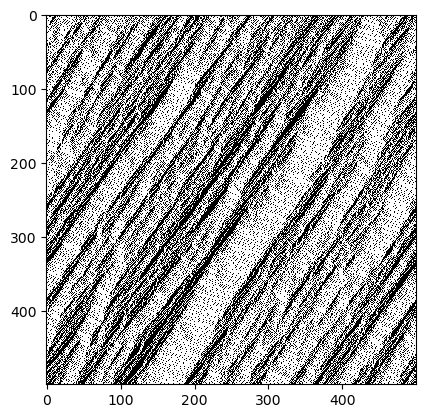

In [5]:
from random import uniform, shuffle
import matplotlib.pyplot as plt
import numpy as np
 
L = 500 # number of cells in row
num_iters = 500 # number of iterations
density = 0.4 # how many positives
vmax = 5
p = 0.2

cars_num = int(density * L)
initial = [0] * cars_num + [-1] * (L - cars_num)
shuffle(initial)

iterations = [initial]

for i in range(num_iters):
	prev,curr = iterations[-1],[-1] * L

	for x in range(L):
		if prev[x] > -1:
			vi = prev[x]
			d = 1
			while prev[(x + d) % L] < 0:
				d += 1

			vtemp = min(vi+1, d - 1, vmax) # increse speed up to max speed, but don't move further than next car
			v = max(vtemp - 1, 0) if uniform(0,1) < p else vtemp # with probability p hit the brakes, otherwise sustain velocity
			curr[(x + v) % L] = v # perform the move
			#print(x,v)

	iterations.append(curr)


a = np.zeros(shape=(num_iters,L))
for i in range(L):
	for j in range(num_iters):
		a[j,i] = 1 if iterations[j][i] > -1 else 0
 
# showing image
plt.imshow(a, cmap="Greys", interpolation="nearest")
plt.show() 

Time step: 1


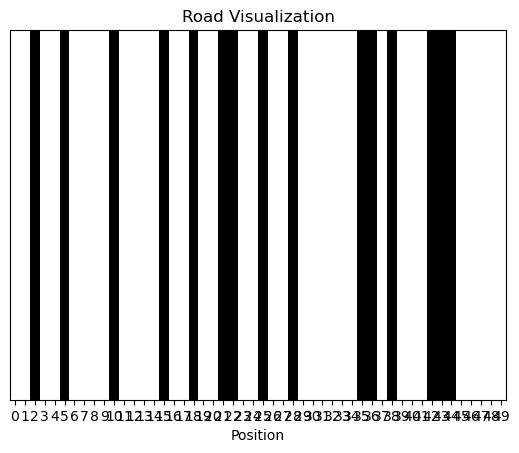


Time step: 2


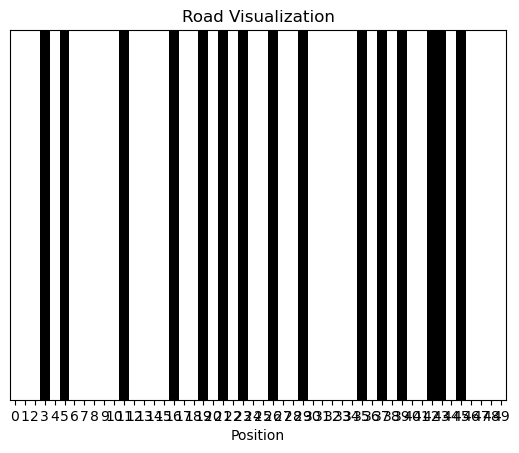


Time step: 3


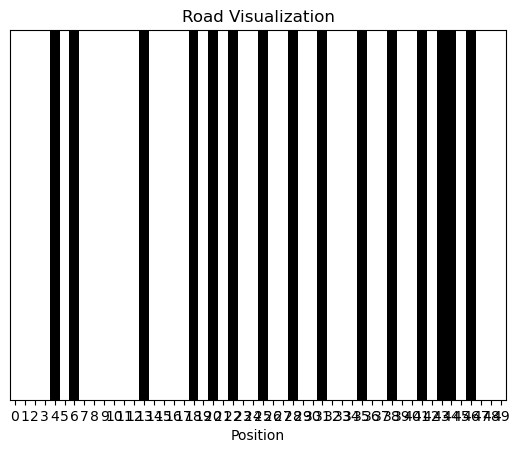


Time step: 4


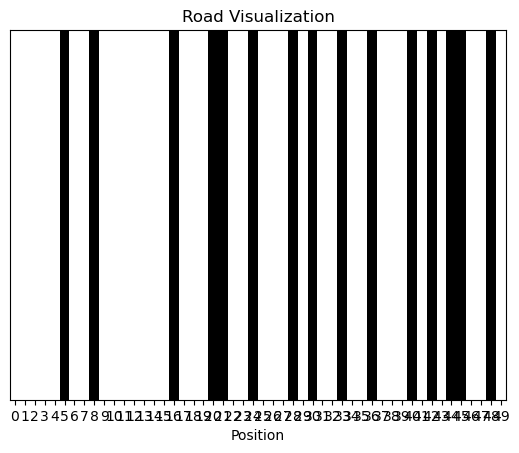


Time step: 5


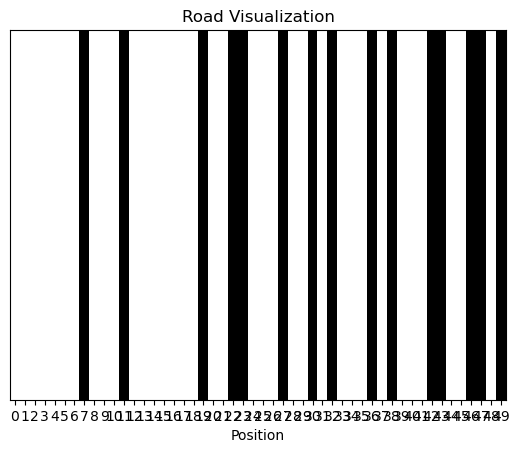


Time step: 6


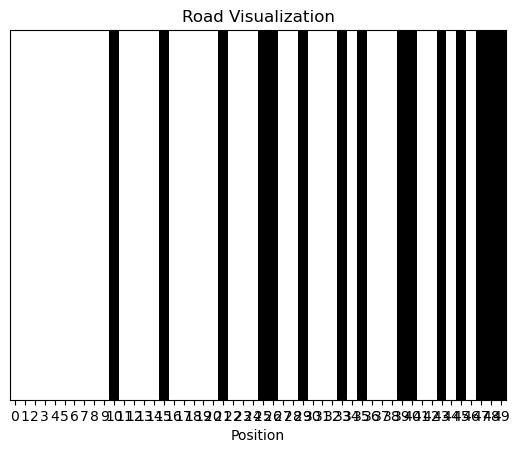


Time step: 7


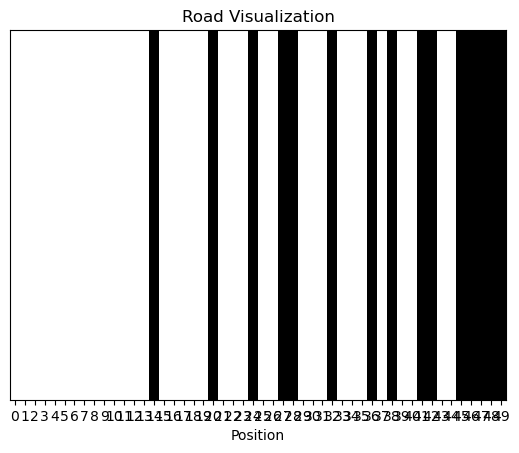


Time step: 8


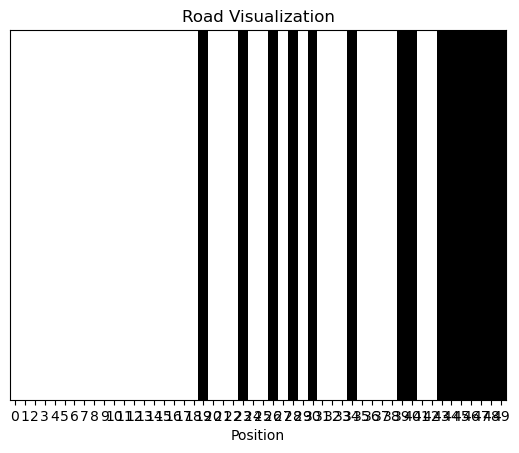


Time step: 9


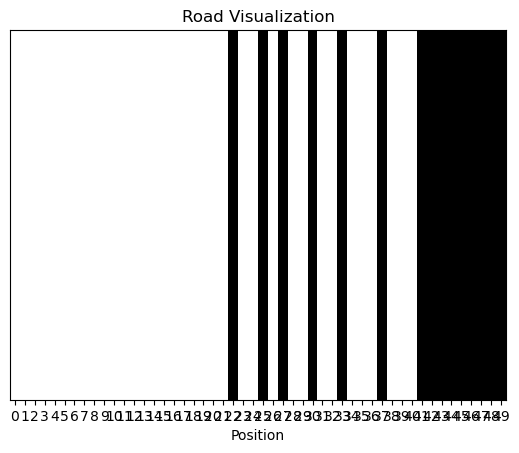


Time step: 10


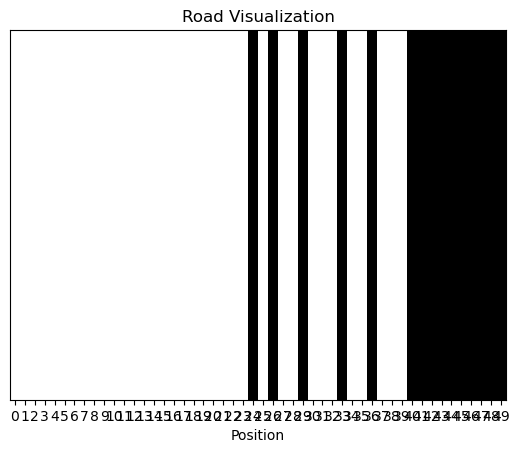


Time step: 11


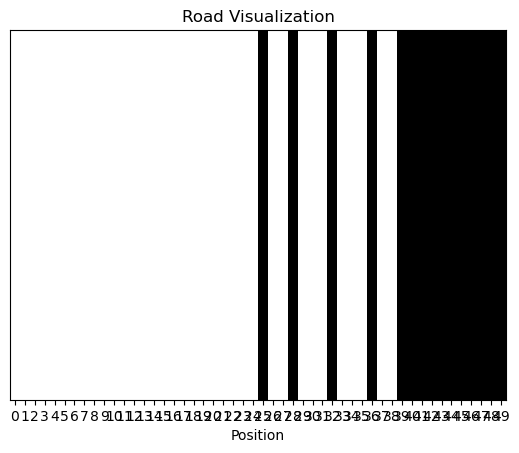


Time step: 12


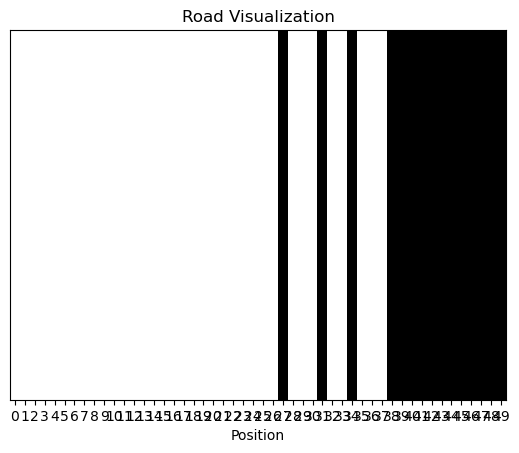


Time step: 13


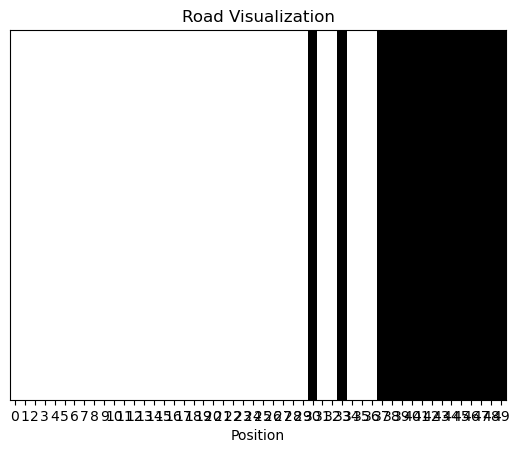


Time step: 14


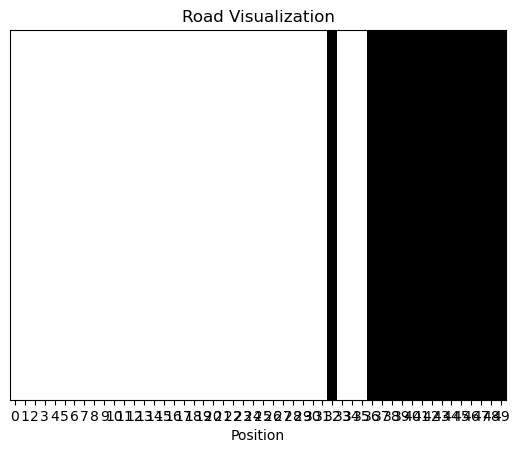


Time step: 15


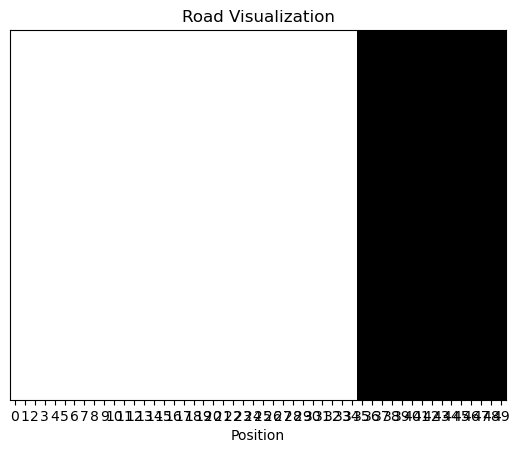


Time step: 16


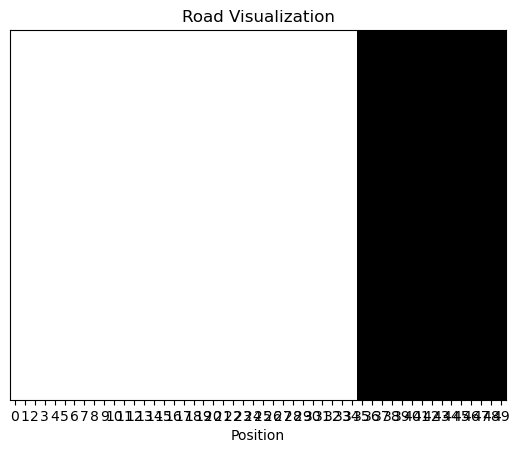


Time step: 17


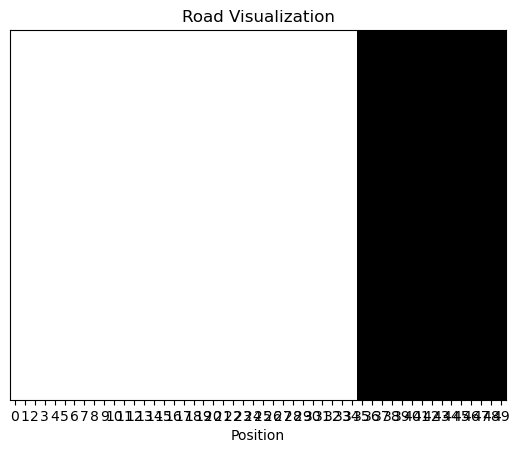


Time step: 18


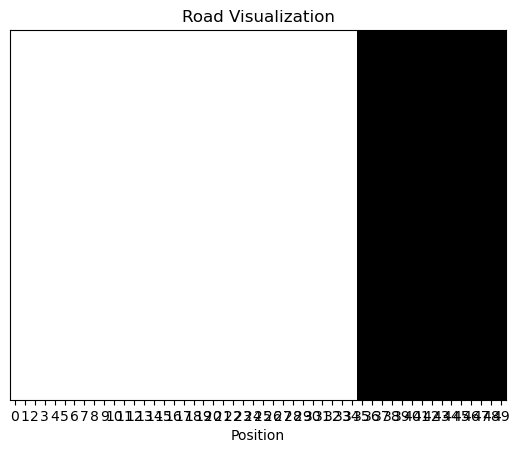


Time step: 19


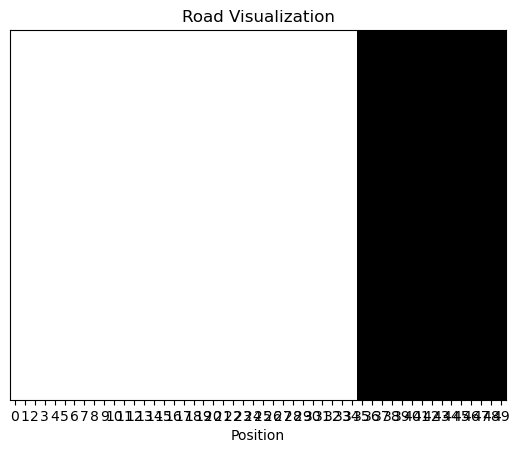


Time step: 20


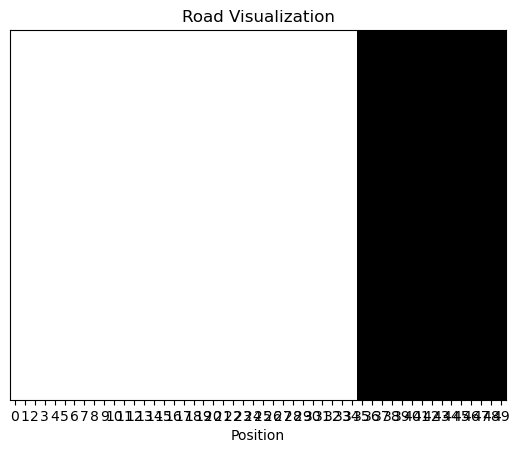

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, density, max_velocity, randomization):
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.vehicles = []

    def setup(self):
        num_vehicles = int(self.density * self.length)
        vehicle_positions = np.random.choice(range(self.length), num_vehicles, replace=False)
        for position in vehicle_positions:
            self.vehicles.append(Vehicle(position, self.max_velocity))

    def update(self):
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            vehicle.position = (vehicle.position + vehicle.velocity) % self.length

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self):
        road_state = np.zeros(self.length)
        for vehicle in self.vehicles:
            road_state[vehicle.position] = 1
        plt.imshow(road_state.reshape(1, -1), cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.xlabel('Position')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 50
density = 0.3
max_velocity = 5
randomization = 0.1
road = Road(length, density, max_velocity, randomization)
road.setup()

for i in range(20):
    print("Time step:", i+1)
    road.visualize()
    road.update()
    print()


Time step: 1


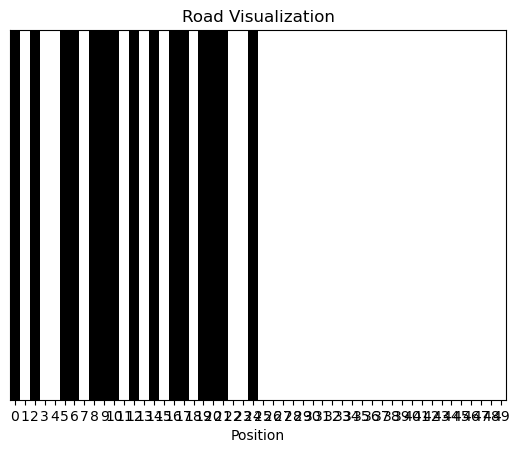


Time step: 2


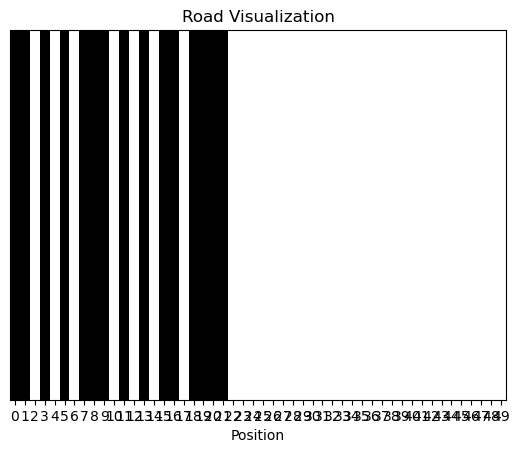


Time step: 3


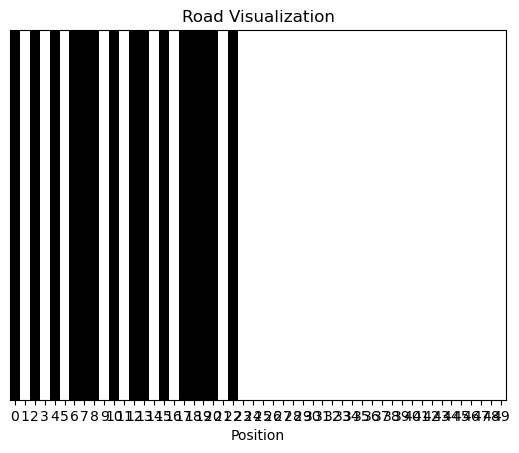


Time step: 4


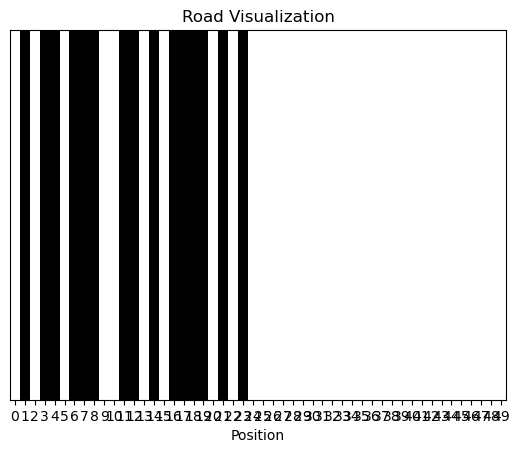


Time step: 5


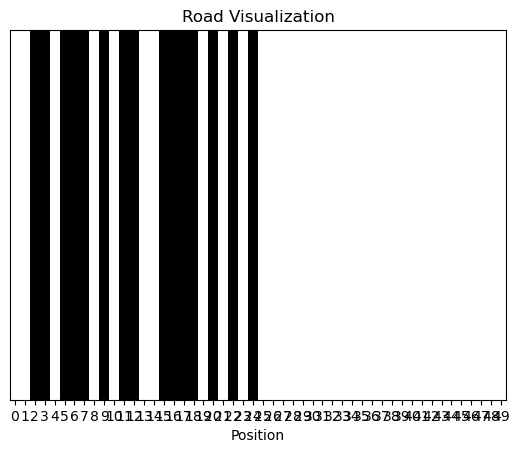


Time step: 6


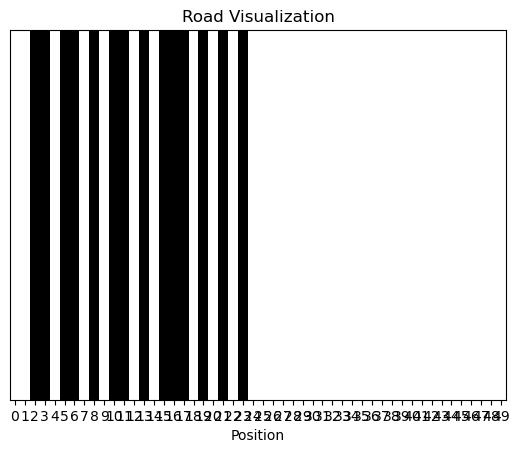


Time step: 7


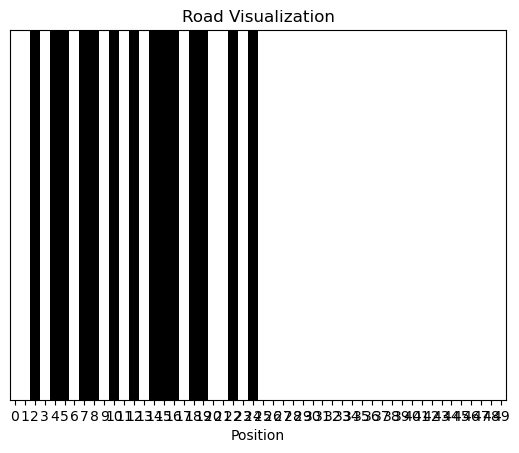


Time step: 8


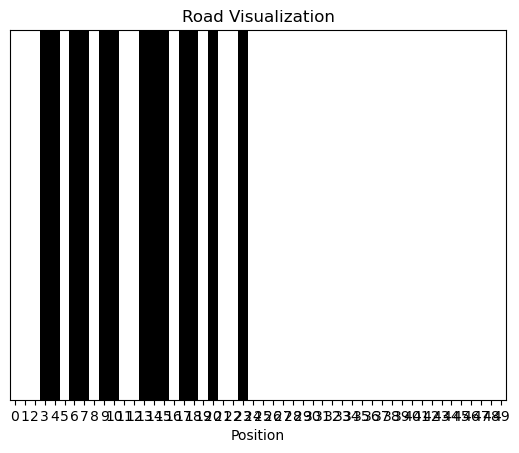


Time step: 9


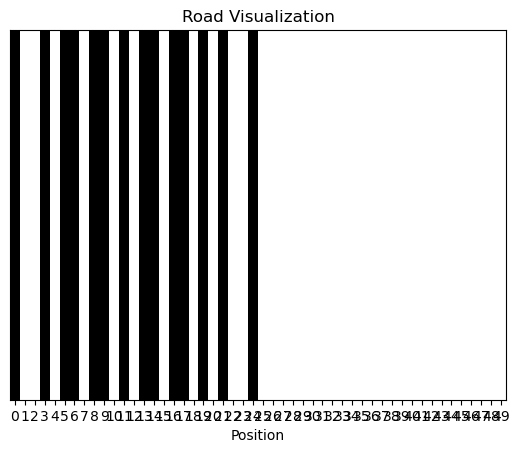


Time step: 10


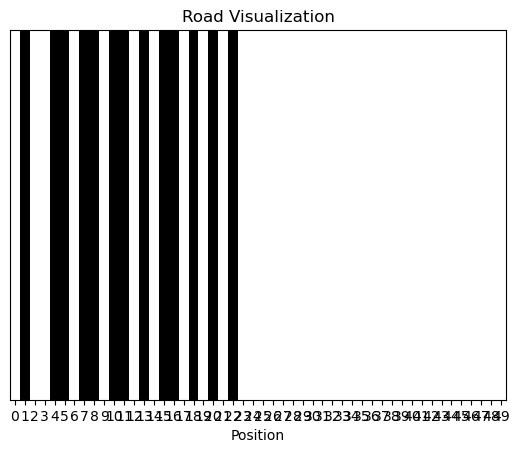


Time step: 11


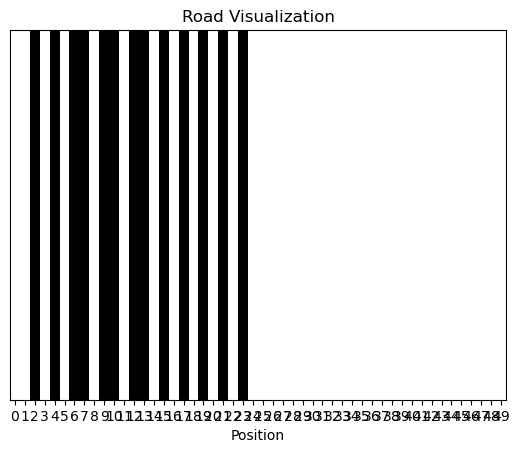


Time step: 12


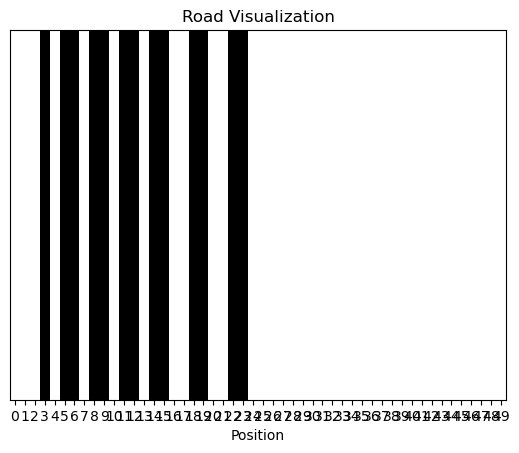


Time step: 13


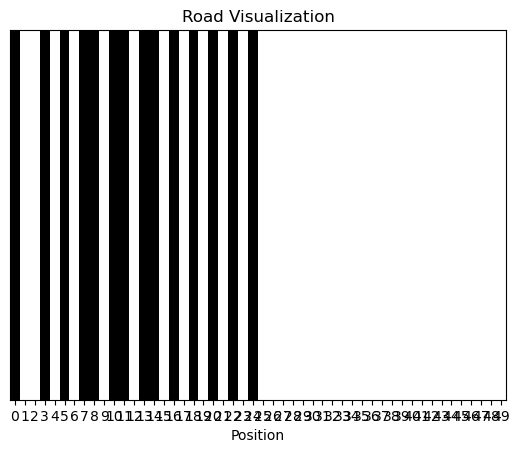


Time step: 14


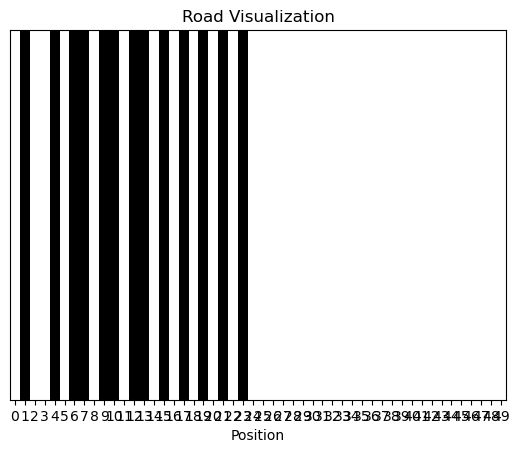


Time step: 15


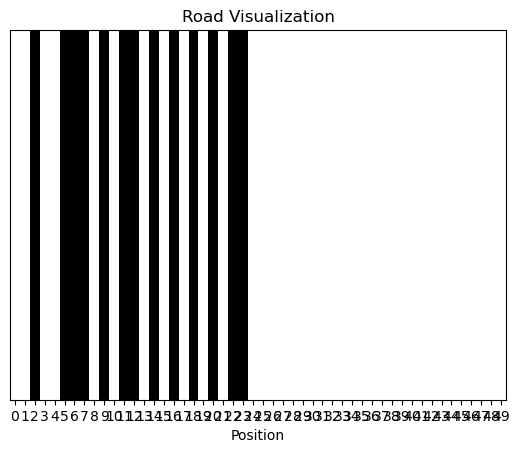


Time step: 16


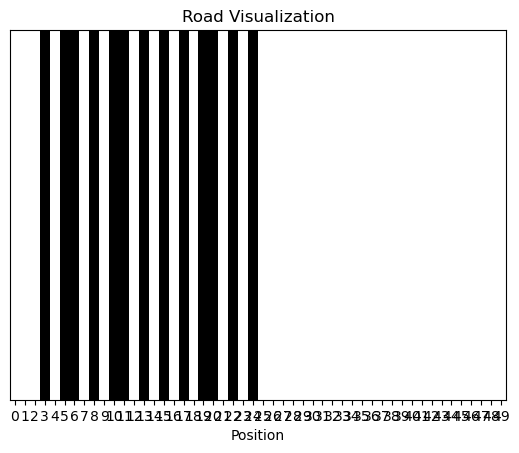


Time step: 17


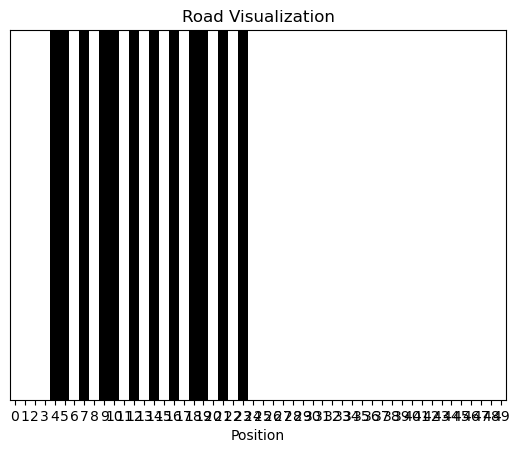


Time step: 18


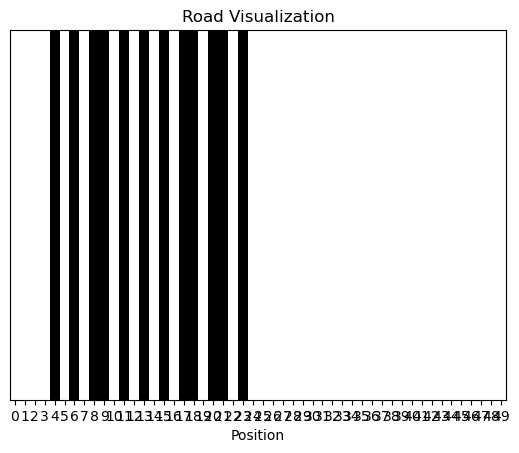


Time step: 19


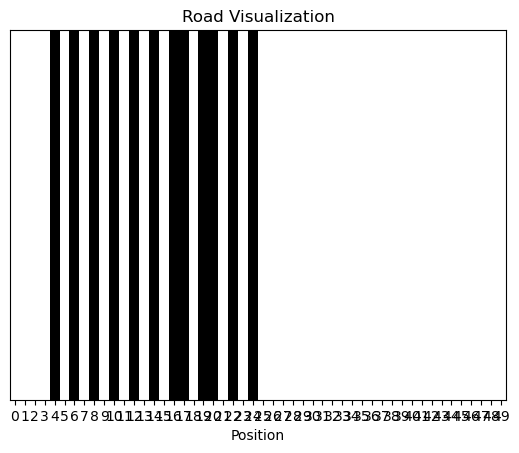


Time step: 20


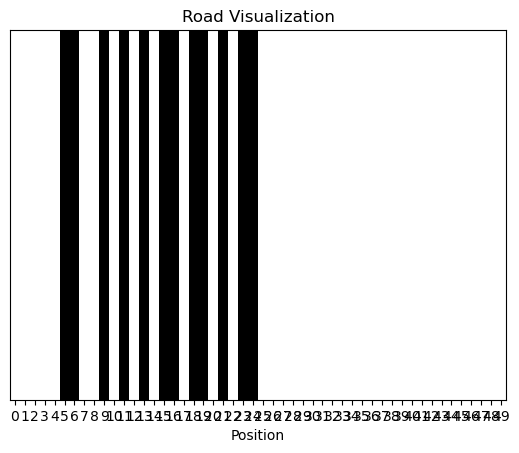

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, density, max_velocity, randomization, production_prob):
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.production_prob = production_prob
        self.vehicles = []

    def setup(self):
        # Clear previous vehicles
        self.vehicles.clear()
        # Create vehicles at one end based on density
        num_vehicles = int(self.density * self.length)
        vehicle_positions = np.random.choice(range(int(self.length / 2)), num_vehicles, replace=False)
        for position in vehicle_positions:
            self.vehicles.append(Vehicle(position, self.max_velocity))

    def update(self):
        new_vehicles = []
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            new_position = (vehicle.position + vehicle.velocity) % self.length
            # Check if the vehicle has reached the other end
            if new_position < int(self.length / 2):
                new_vehicles.append(Vehicle(new_position, self.max_velocity))
        self.vehicles = new_vehicles

        # Introduce new vehicles at one end based on production probability
        if np.random.rand() < self.production_prob:
            self.vehicles.append(Vehicle(0, self.max_velocity))

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self):
        road_state = np.zeros(self.length)
        for vehicle in self.vehicles:
            road_state[vehicle.position] = 1
        plt.imshow(road_state.reshape(1, -1), cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.xlabel('Position')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 50
density = 0.3
max_velocity = 5
randomization = 0.1
production_prob = 0.1
road = Road(length, density, max_velocity, randomization, production_prob)
road.setup()

for i in range(20):
    print("Time step:", i+1)
    road.visualize()
    road.update()
    print()


Time step: 1


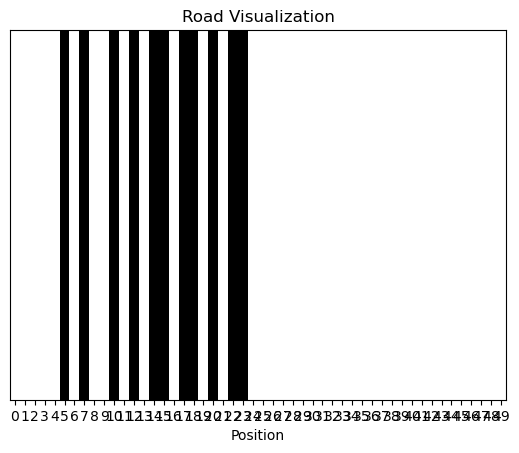


Time step: 2


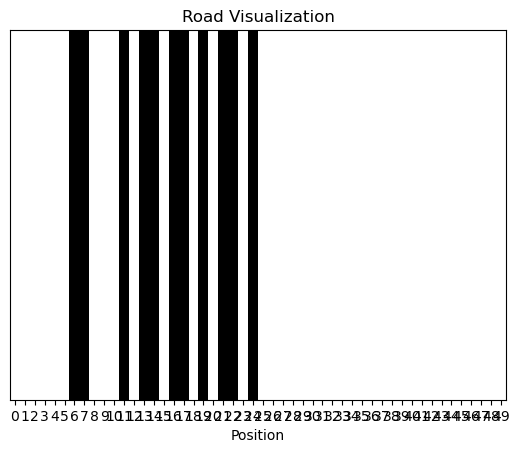


Time step: 3


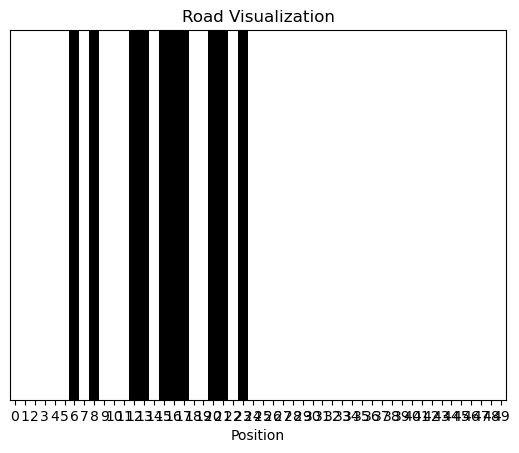


Time step: 4


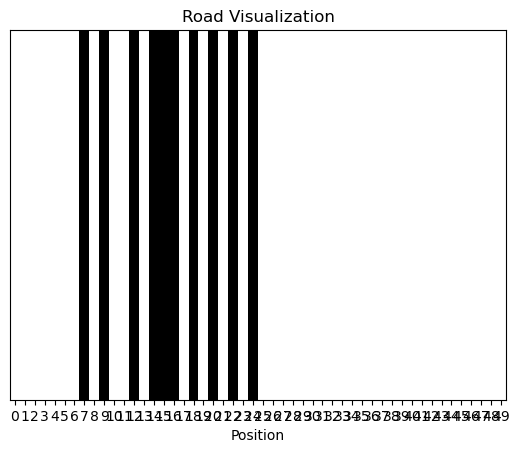


Time step: 5


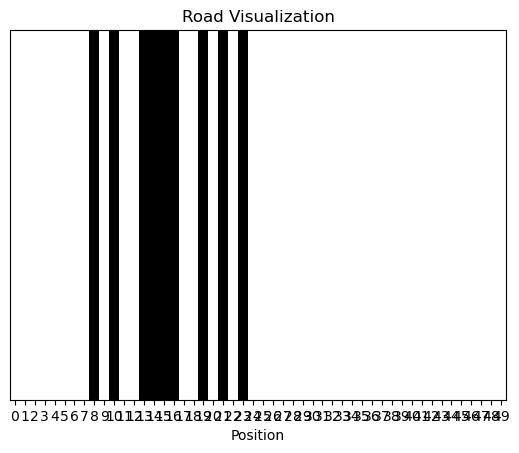


Time step: 6


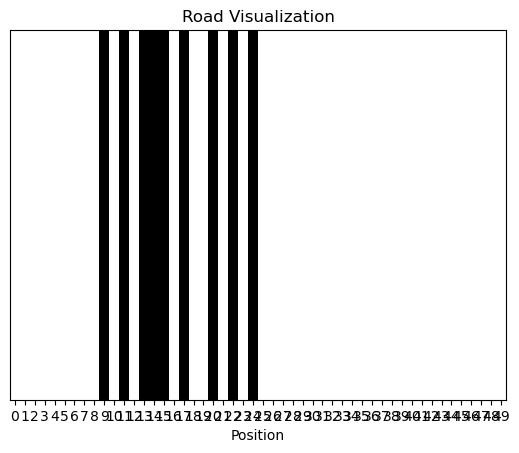


Time step: 7


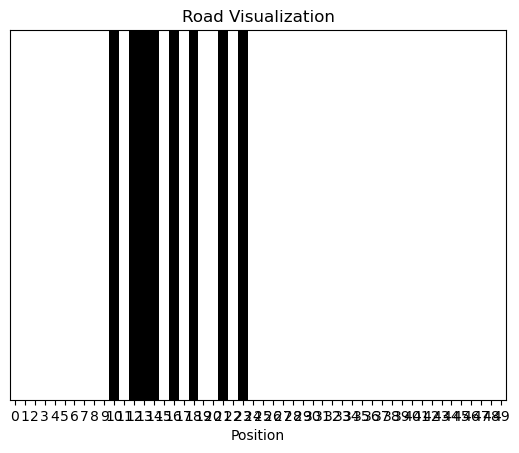


Time step: 8


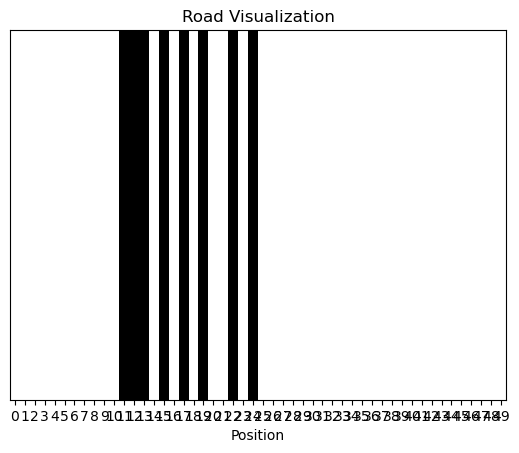


Time step: 9


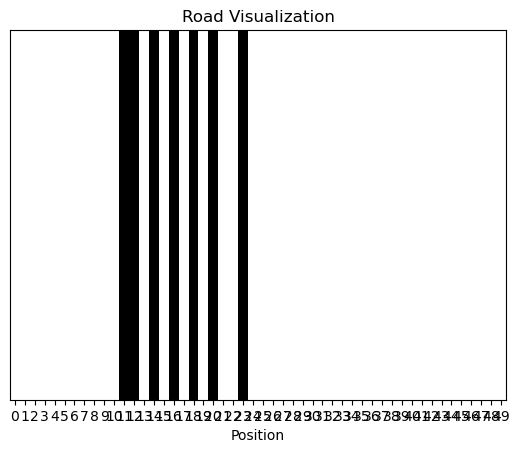


Time step: 10


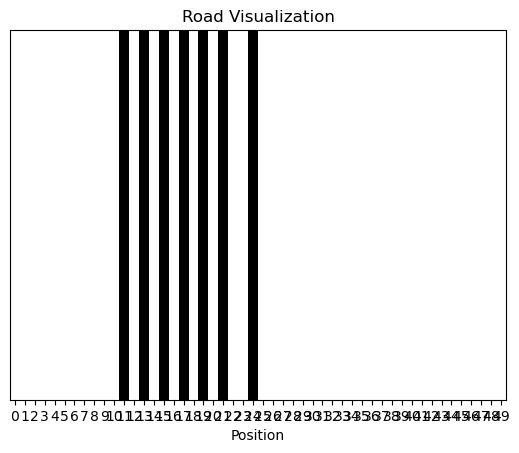


Time step: 11


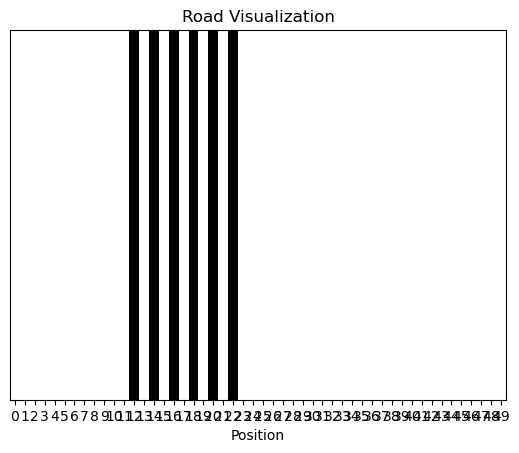


Time step: 12


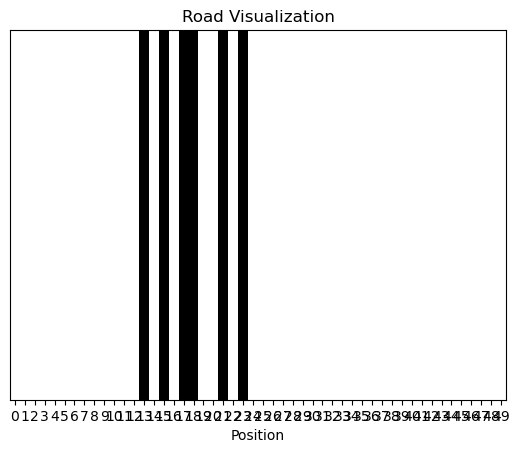


Time step: 13


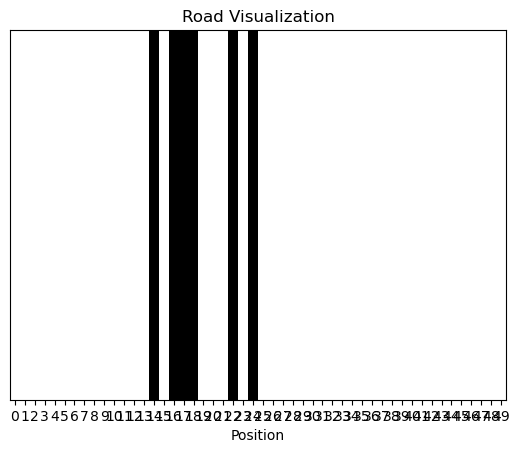


Time step: 14


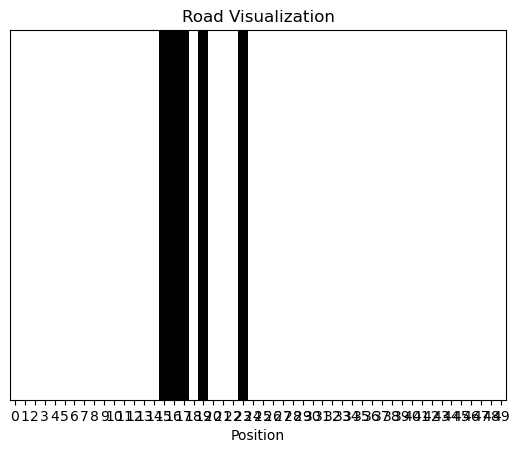


Time step: 15


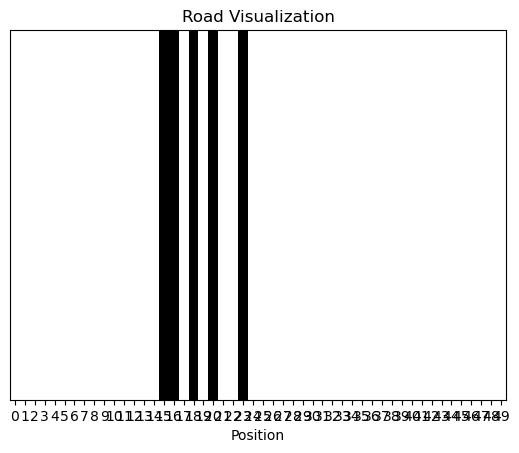


Time step: 16


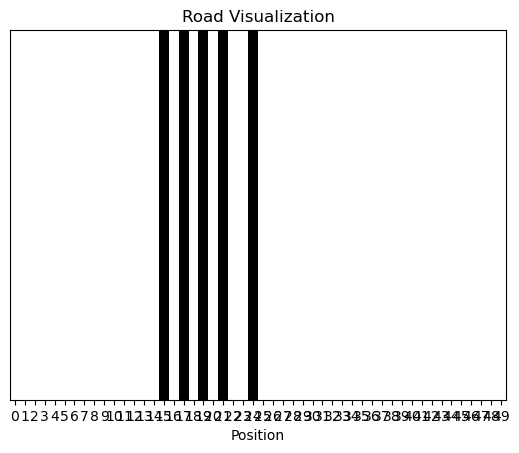


Time step: 17


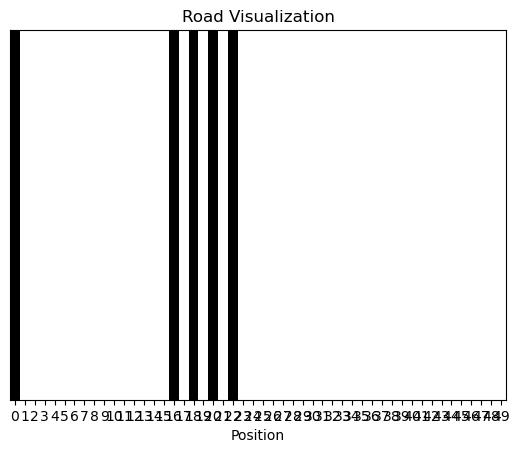


Time step: 18


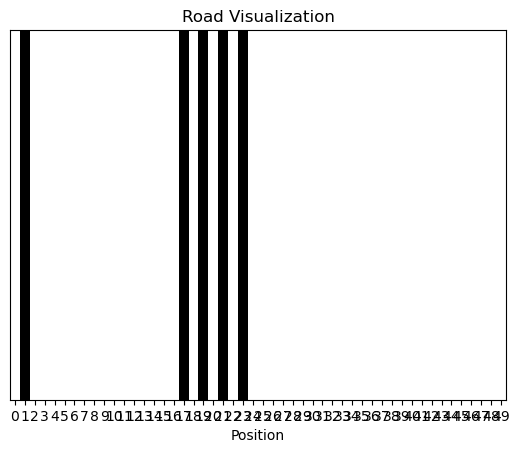


Time step: 19


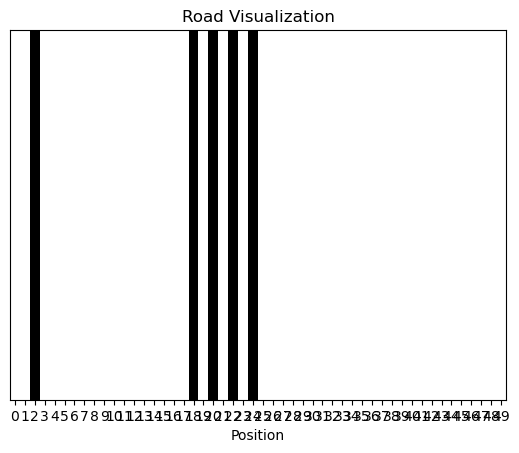


Time step: 20


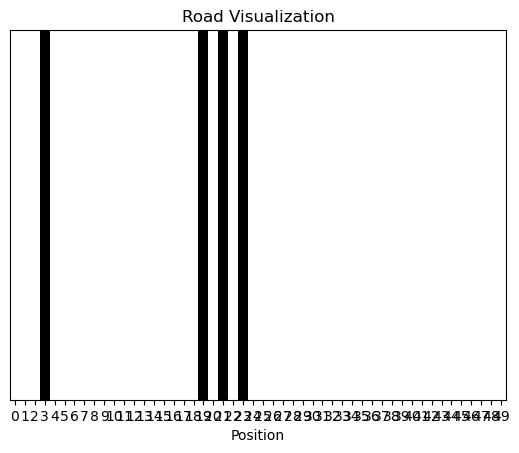


Time step: 21


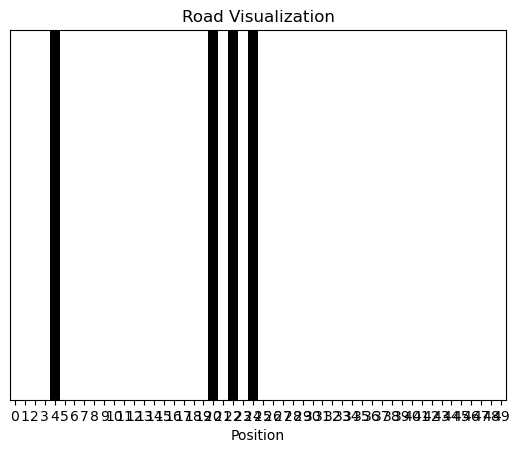


Time step: 22


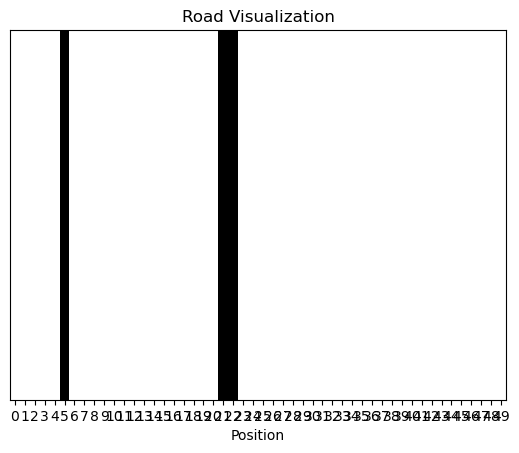


Time step: 23


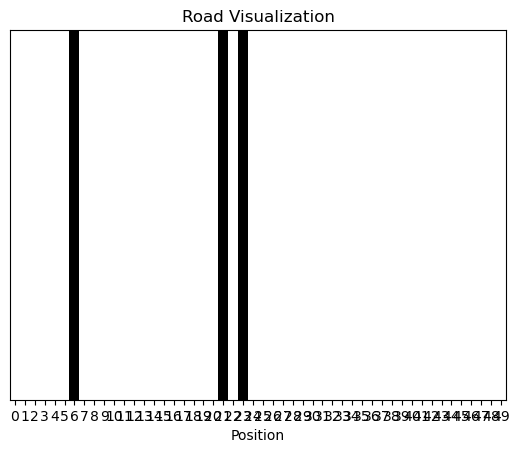


Time step: 24


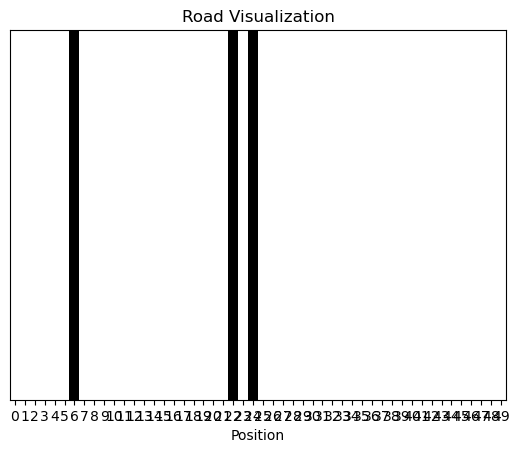


Time step: 25


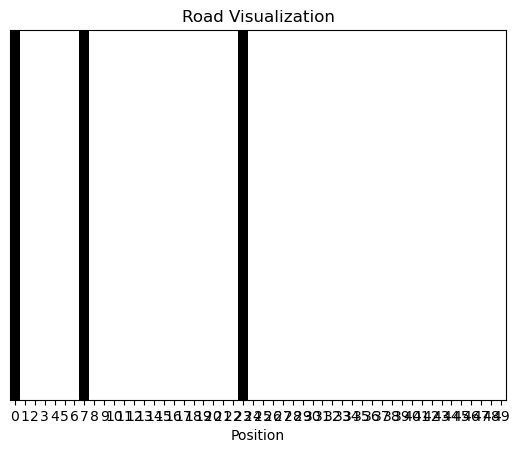


Time step: 26


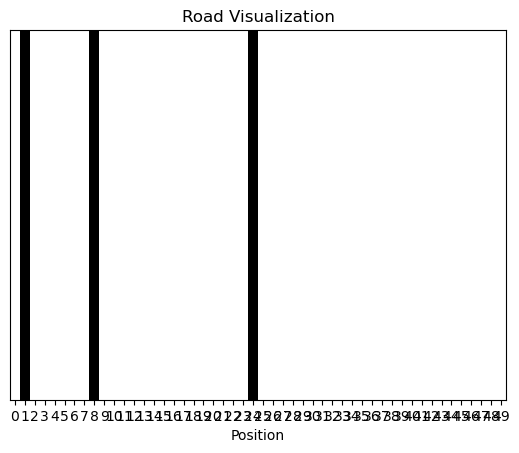


Time step: 27


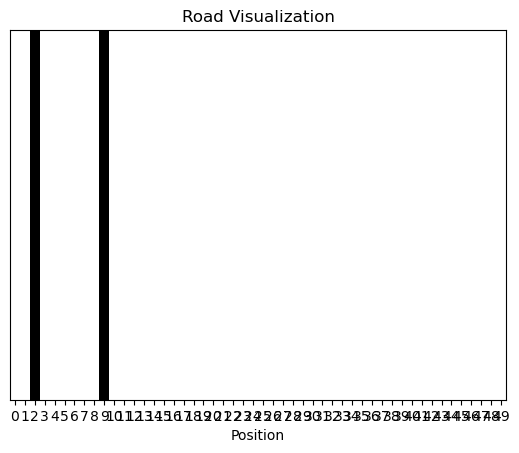


Time step: 28


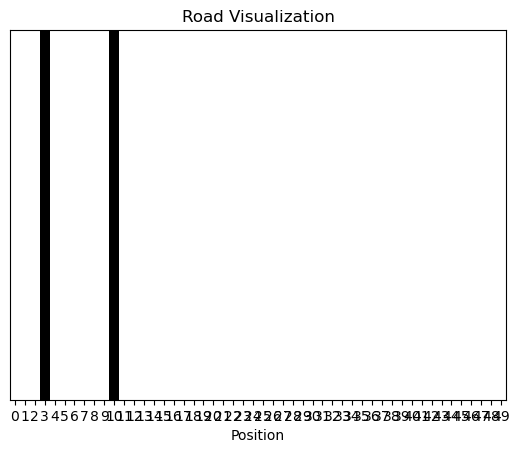


Time step: 29


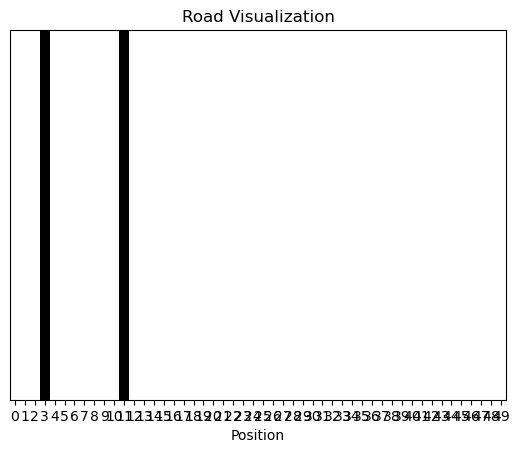


Time step: 30


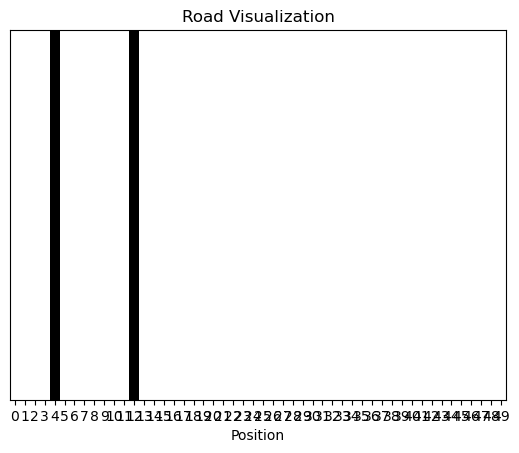


Time step: 31


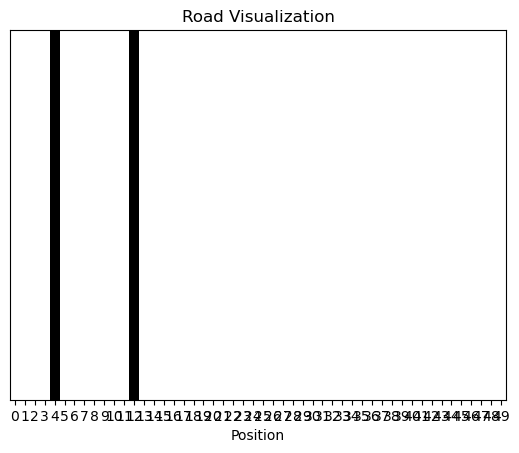


Time step: 32


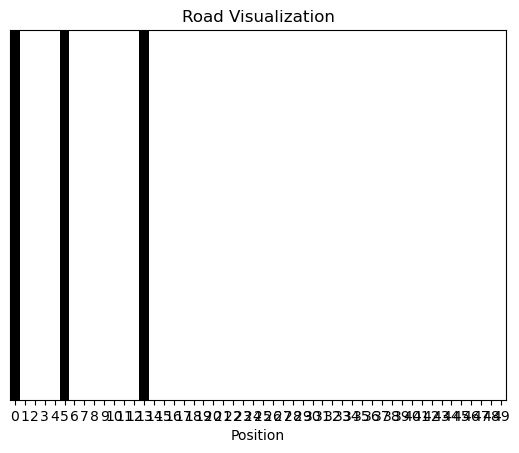


Time step: 33


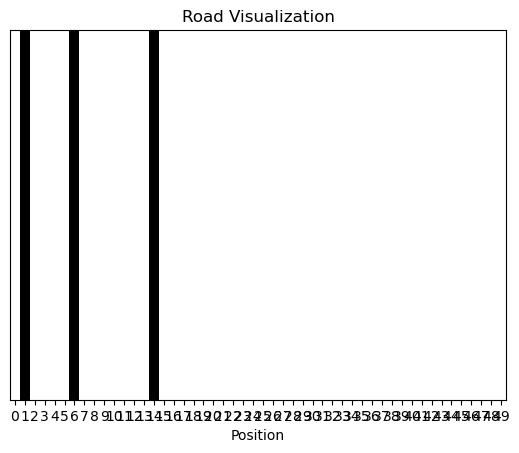


Time step: 34


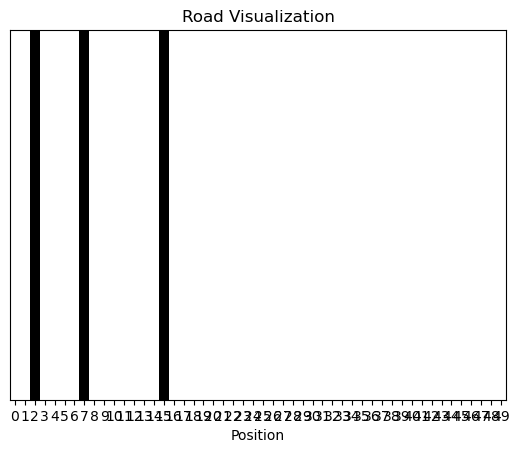


Time step: 35


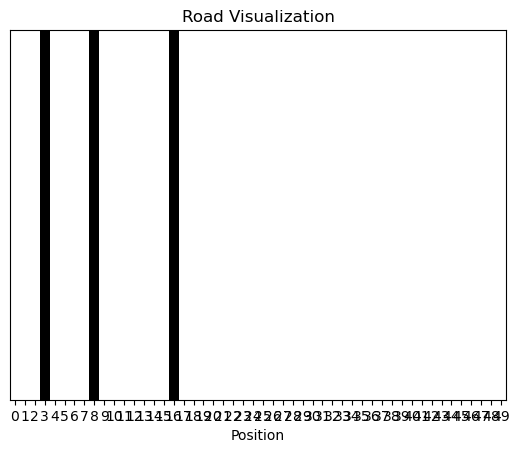


Time step: 36


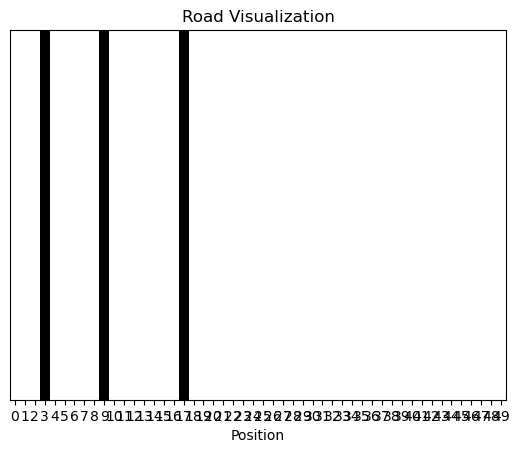


Time step: 37


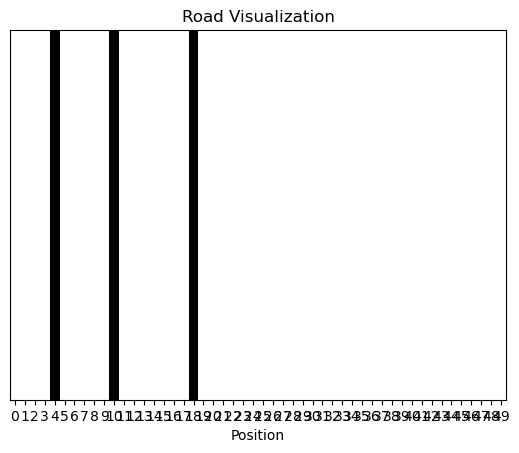


Time step: 38


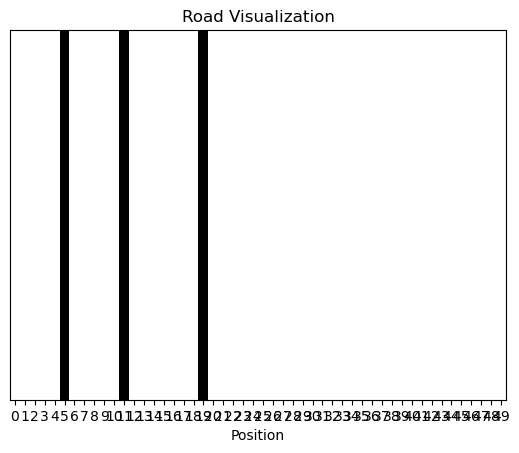


Time step: 39


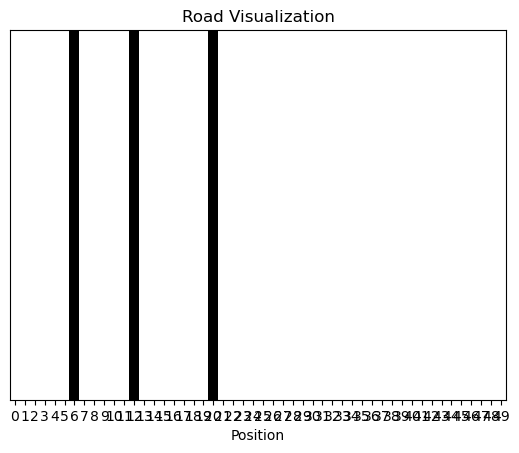


Time step: 40


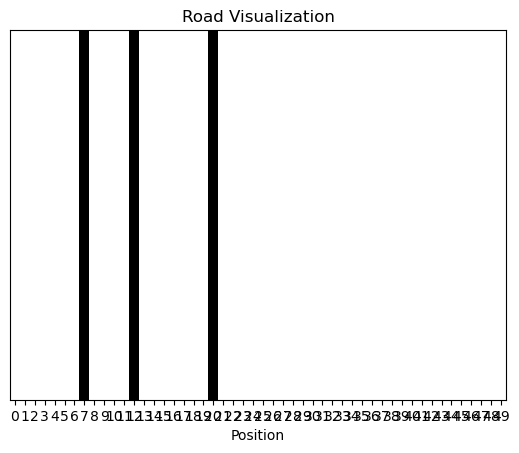


Time step: 41


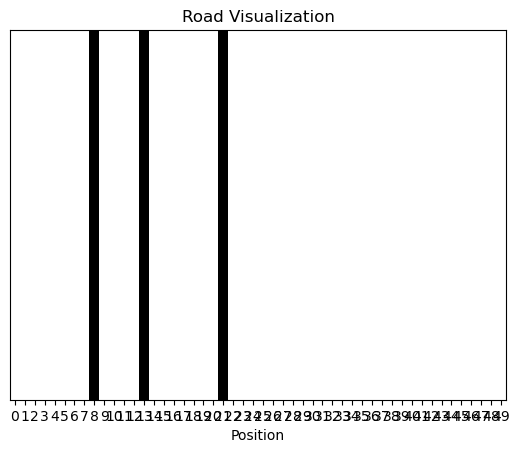


Time step: 42


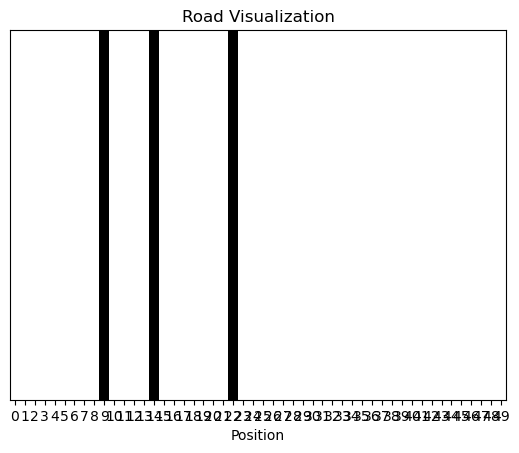


Time step: 43


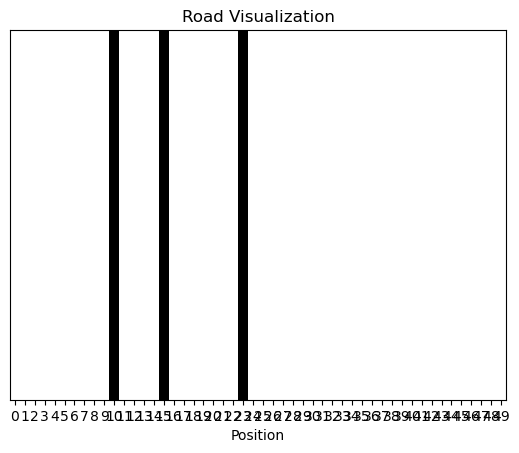


Time step: 44


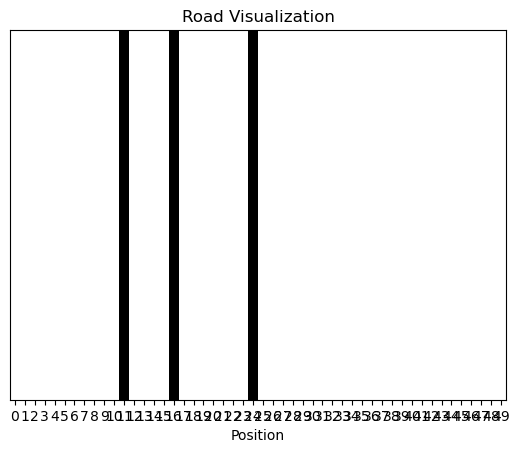


Time step: 45


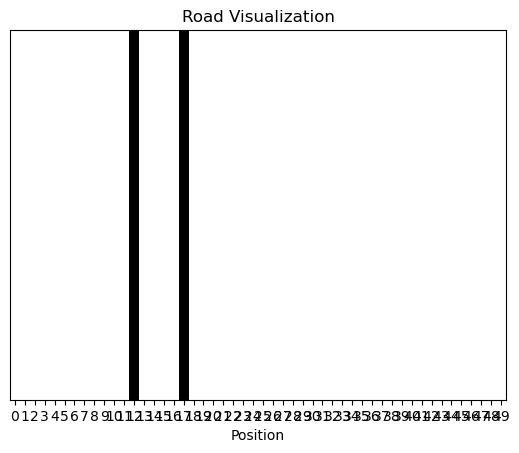


Time step: 46


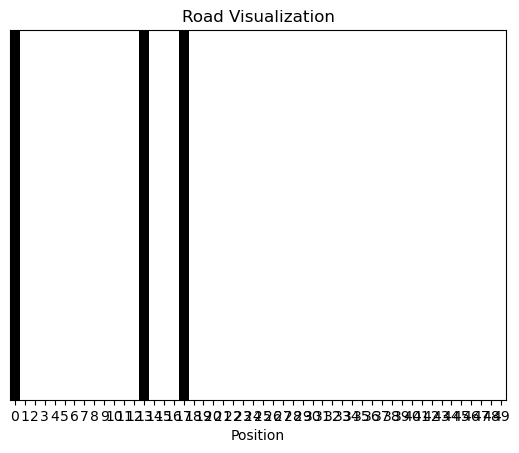


Time step: 47


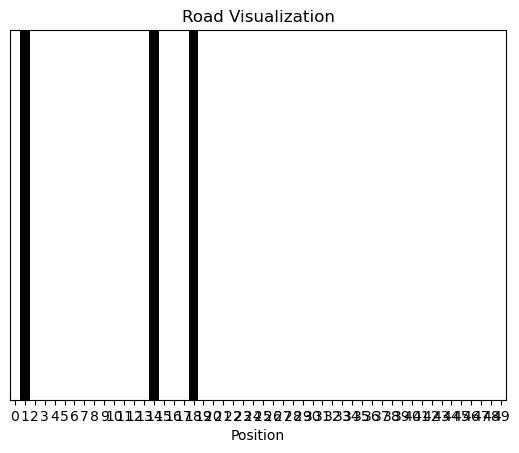


Time step: 48


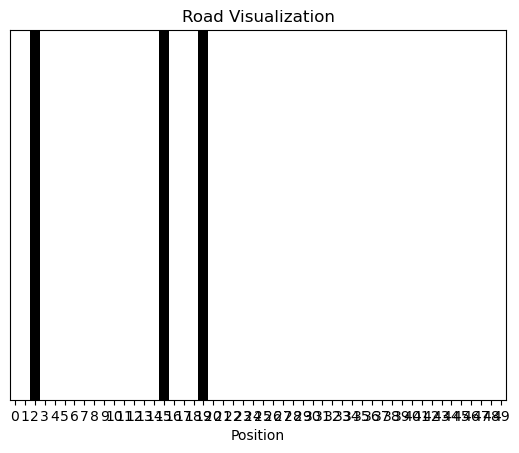


Time step: 49


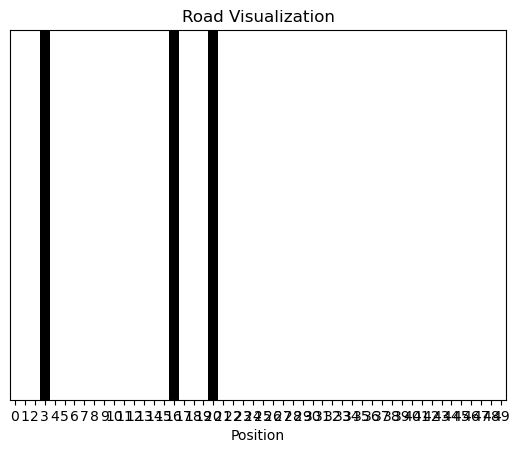


Time step: 50


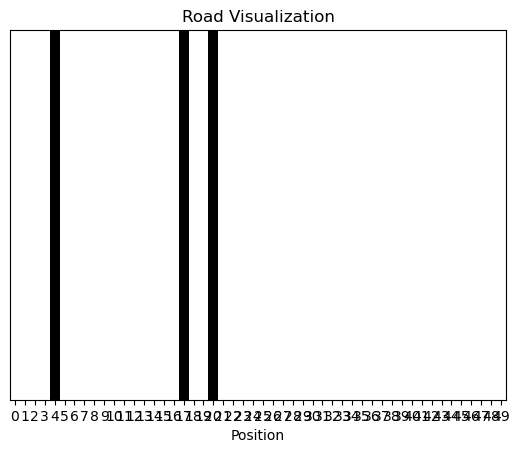


Time step: 51


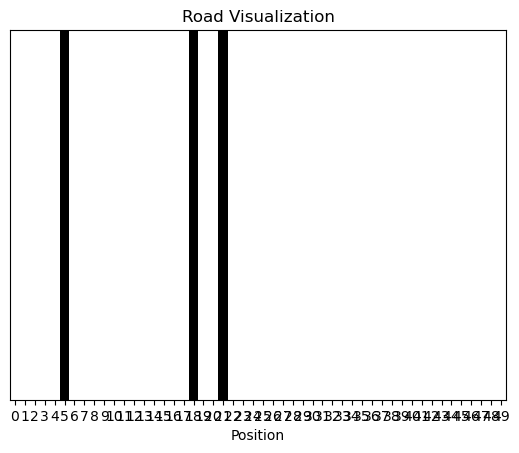


Time step: 52


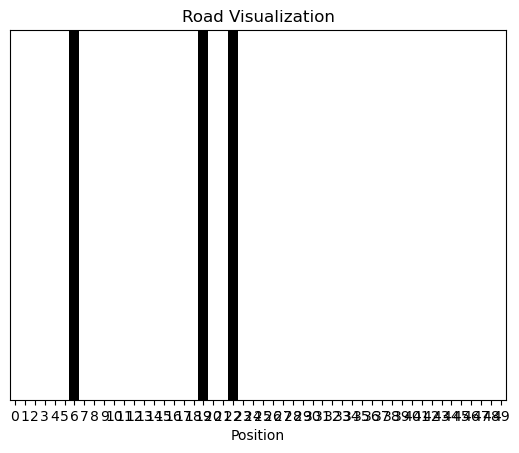


Time step: 53


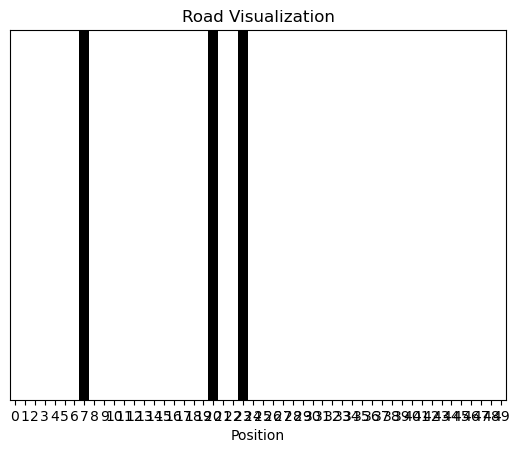


Time step: 54


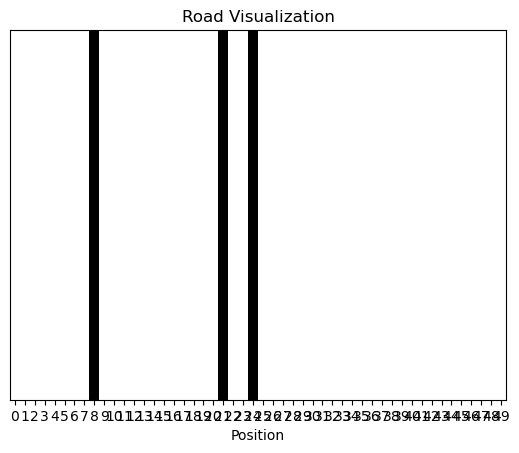


Time step: 55


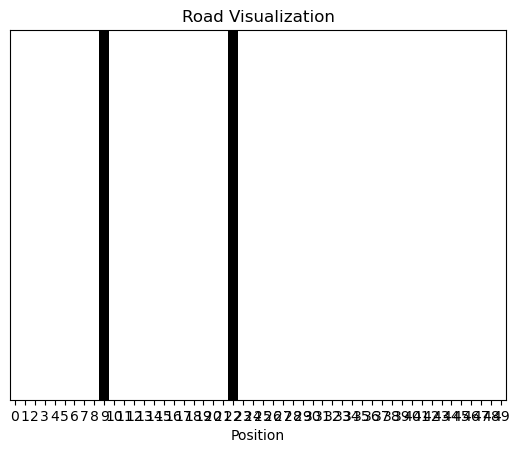


Time step: 56


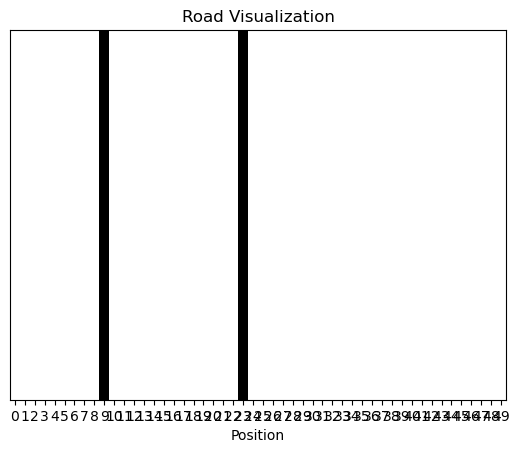


Time step: 57


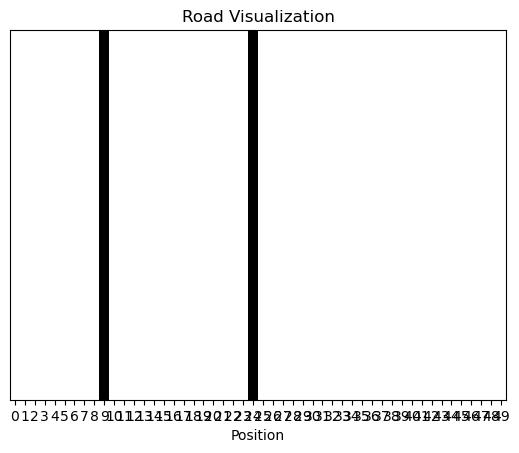


Time step: 58


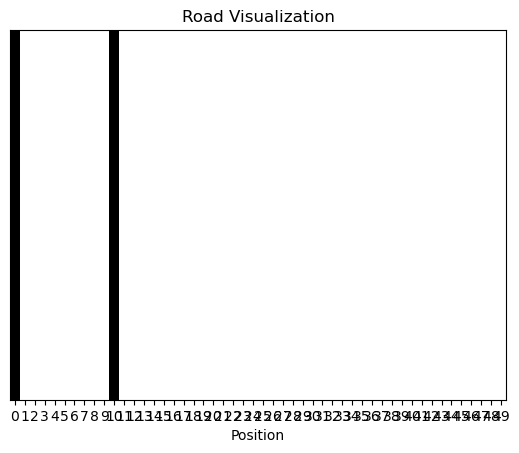


Time step: 59


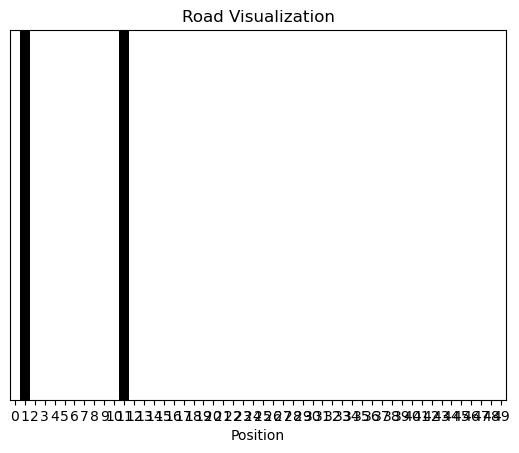


Time step: 60


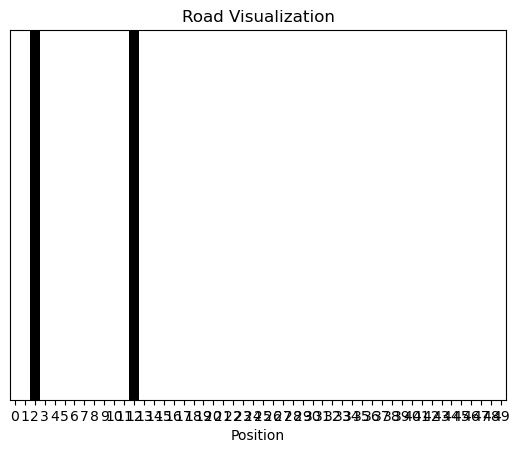


Time step: 61


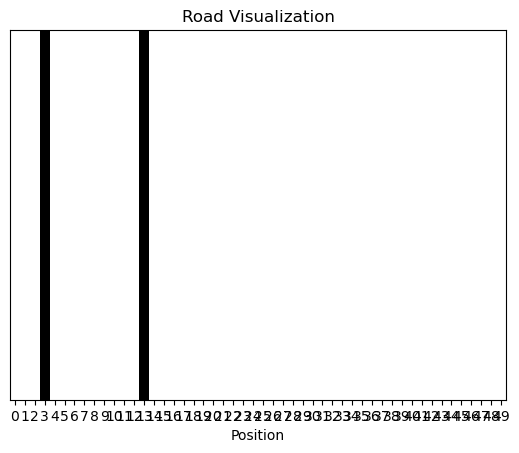


Time step: 62


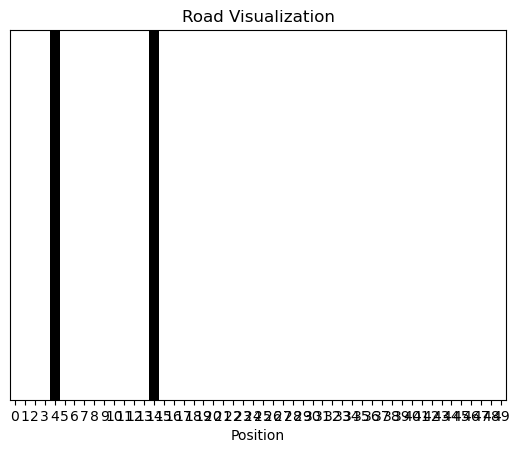


Time step: 63


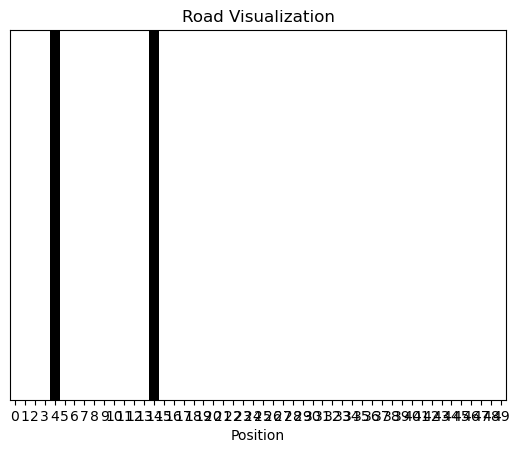


Time step: 64


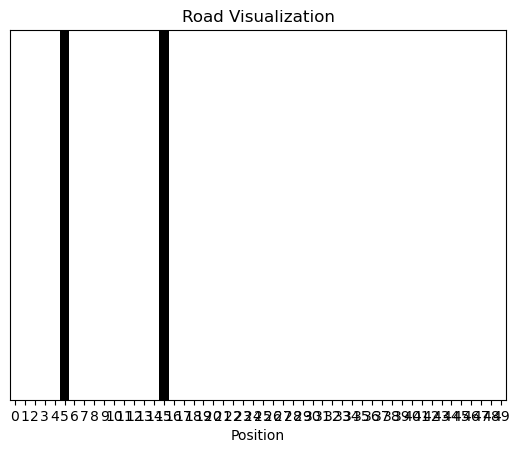


Time step: 65


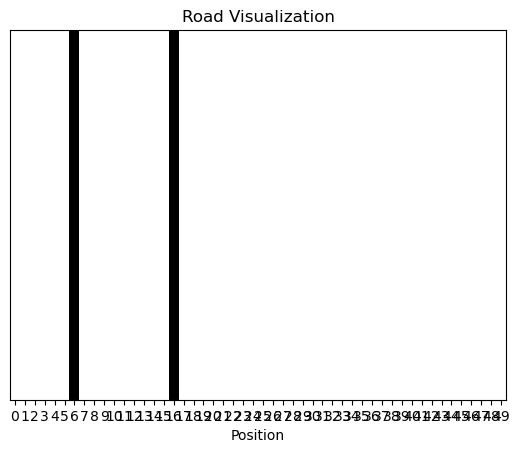


Time step: 66


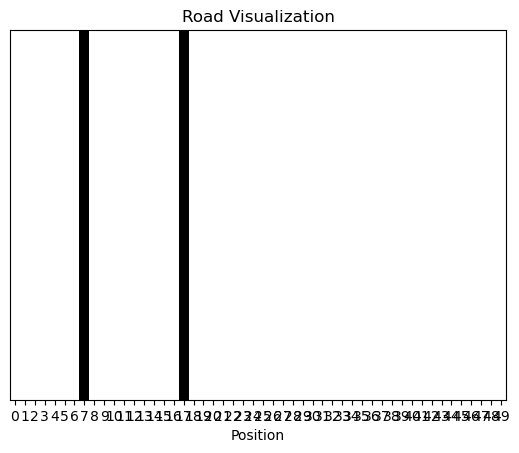

In [ ]:
for i in range(100):
    print("Time step:", i+1)
    road.visualize()
    road.update()
    print()

Time step: 1


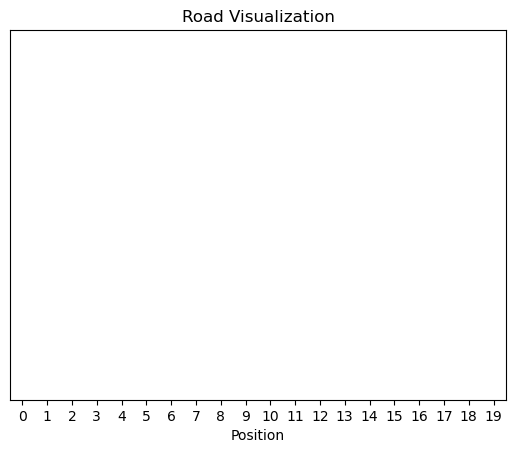


Time step: 2


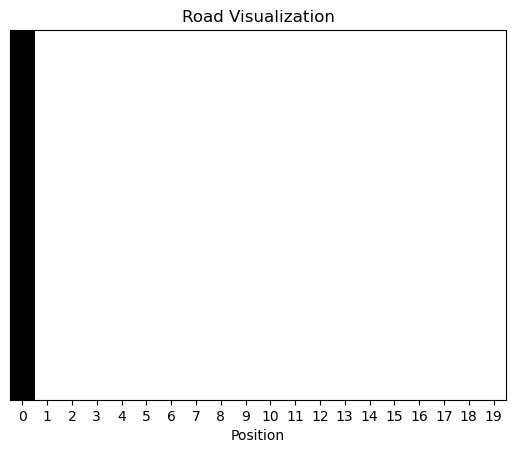


Time step: 3


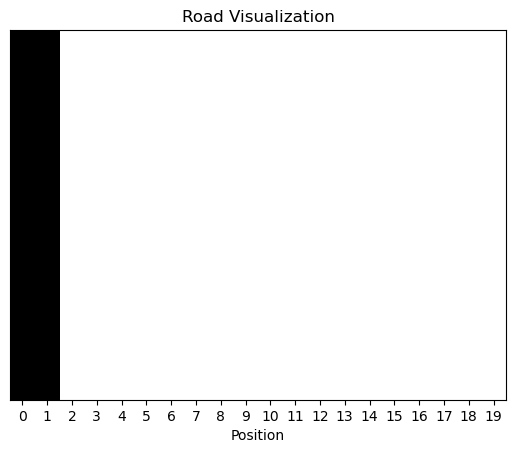


Time step: 4


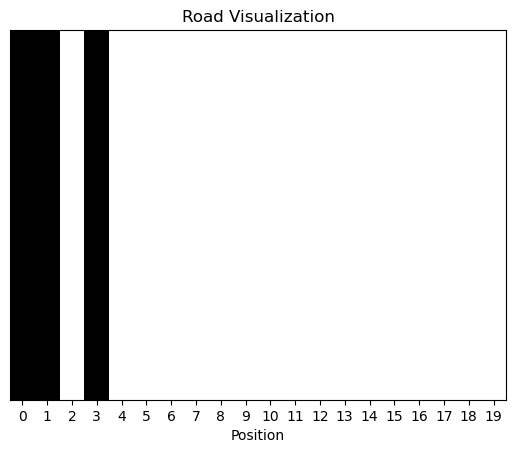


Time step: 5


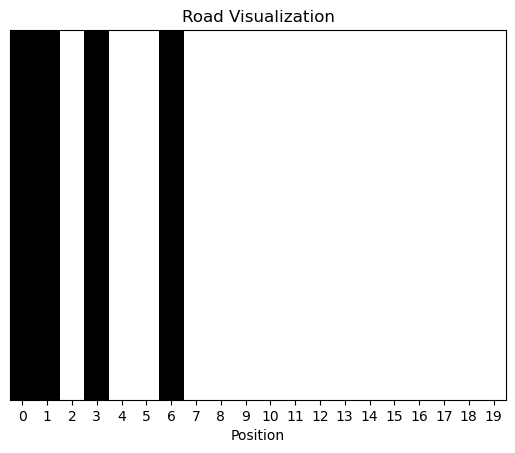


Time step: 6


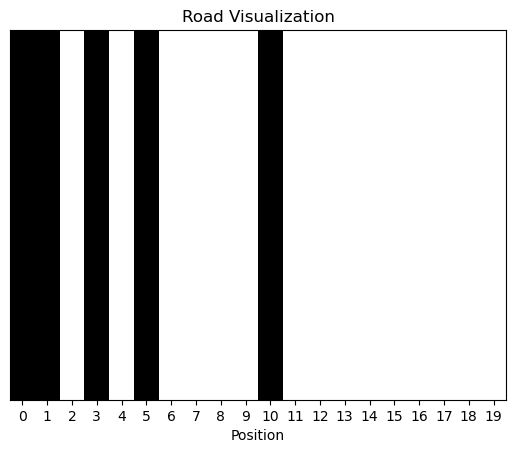


Time step: 7


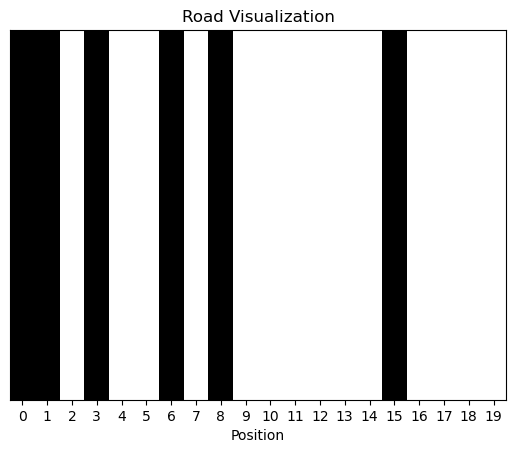


Time step: 8


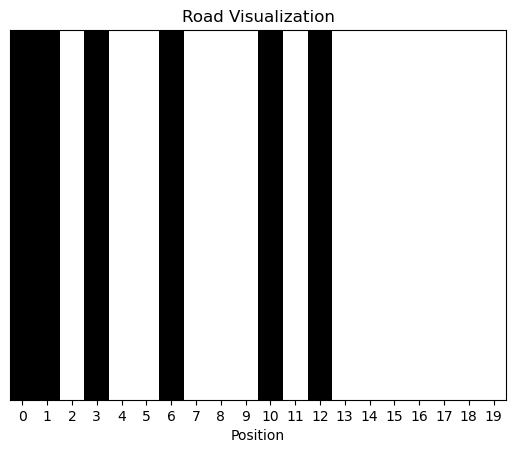


Time step: 9


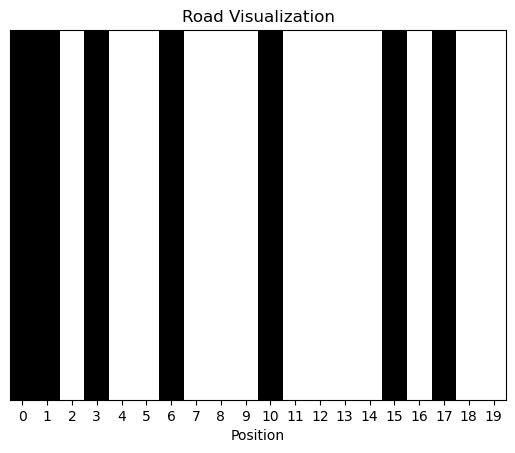


Time step: 10


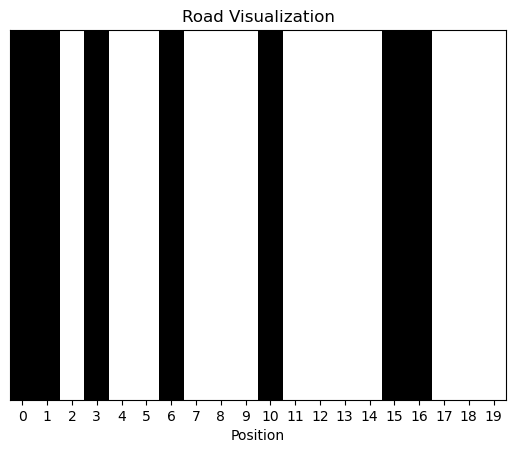


Time step: 11


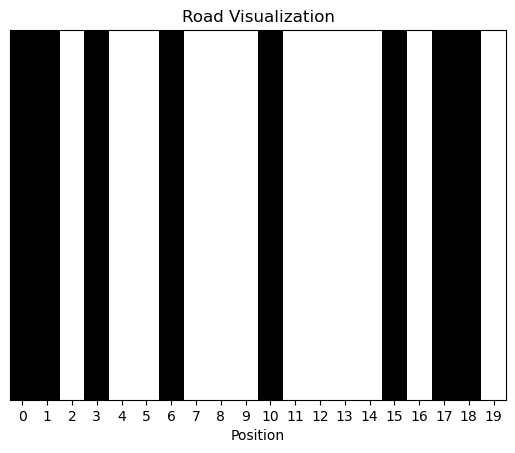


Time step: 12


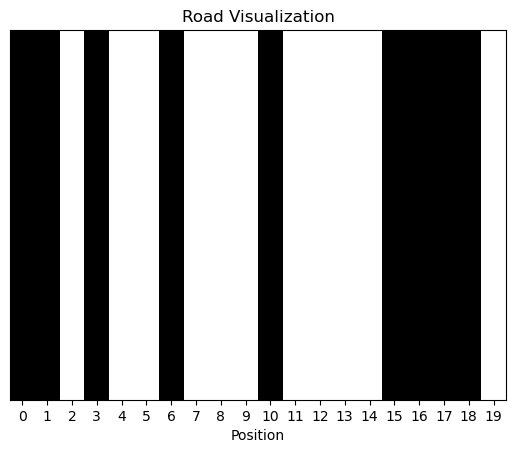


Time step: 13


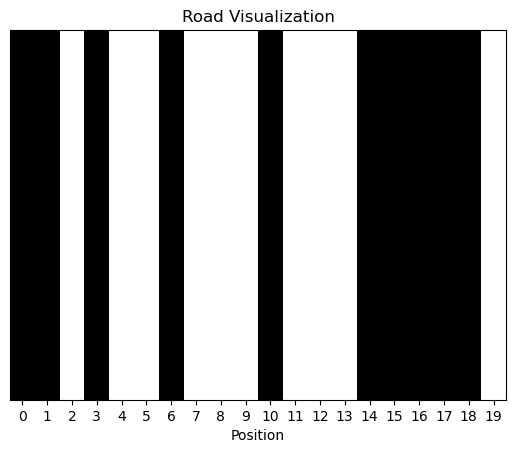


Time step: 14


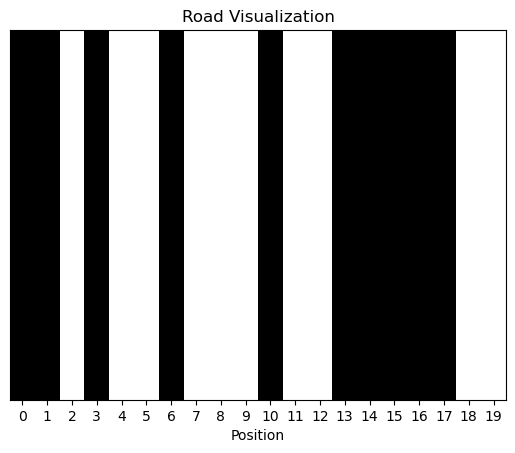


Time step: 15


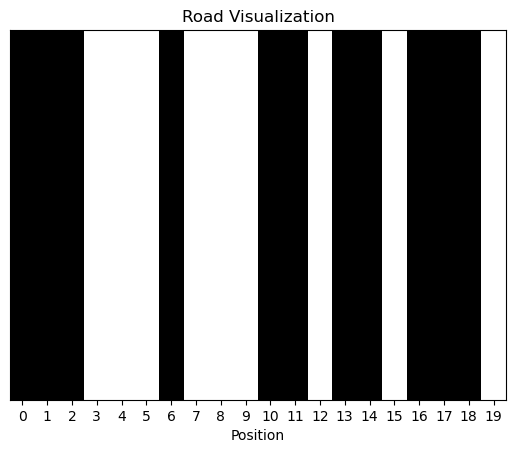


Time step: 16


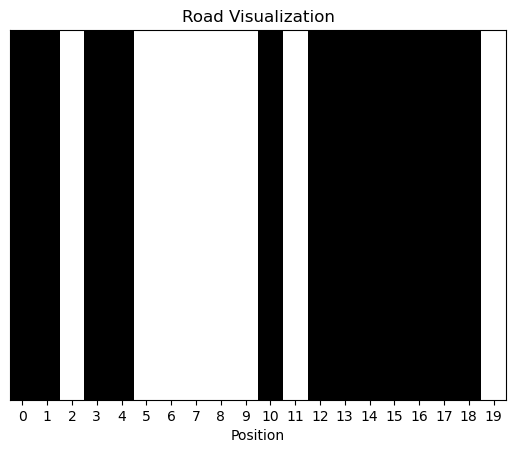


Time step: 17


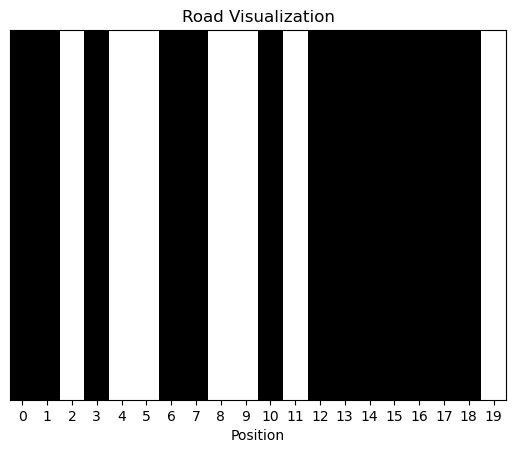


Time step: 18


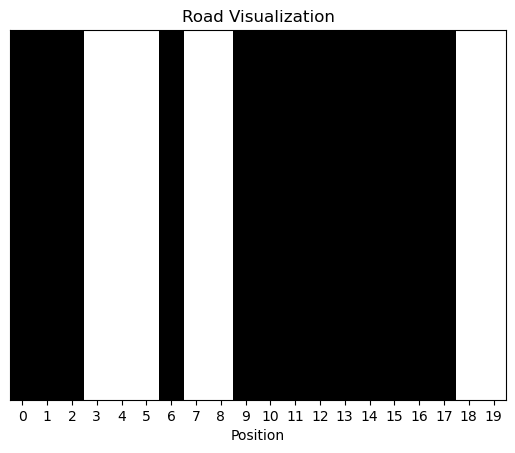


Time step: 19


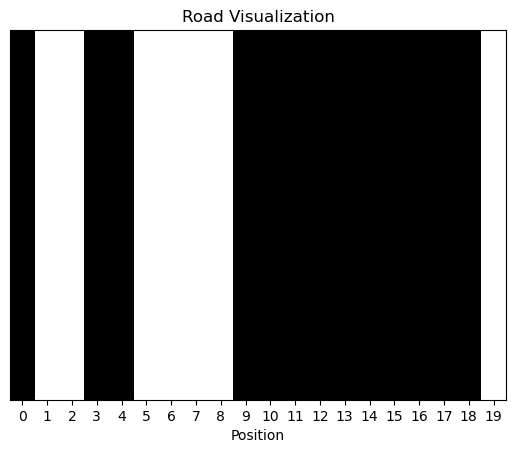


Time step: 20


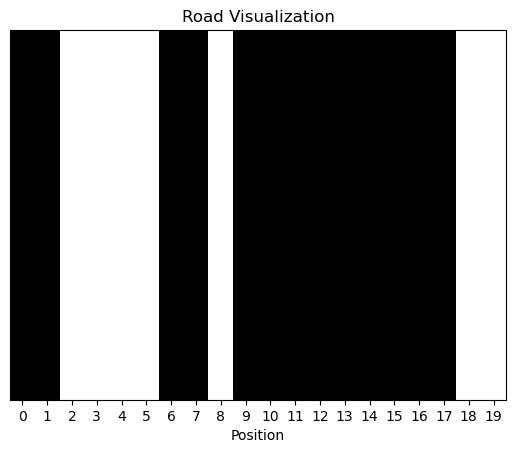


Time step: 21


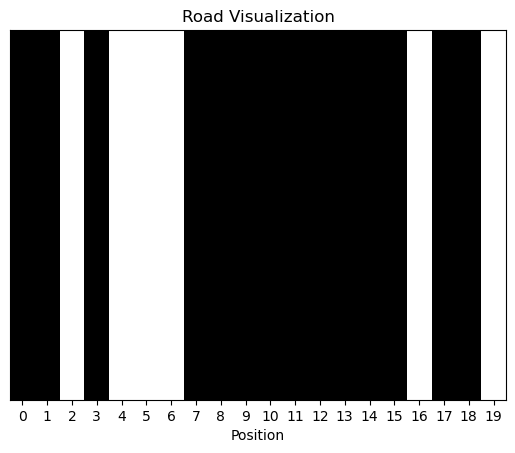


Time step: 22


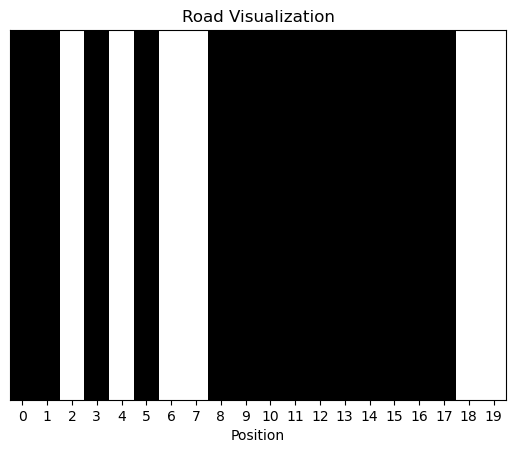


Time step: 23


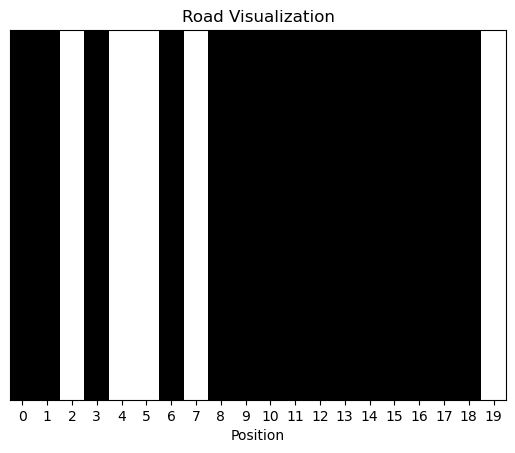


Time step: 24


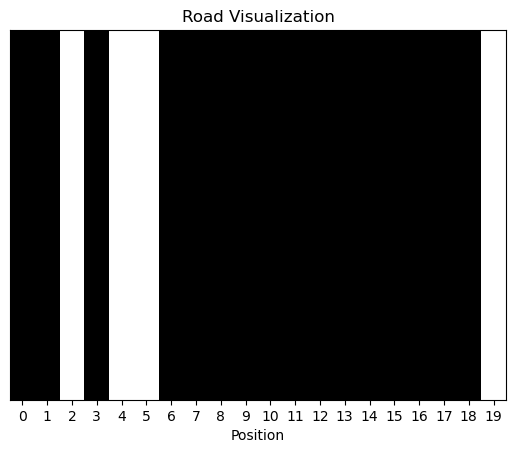


Time step: 25


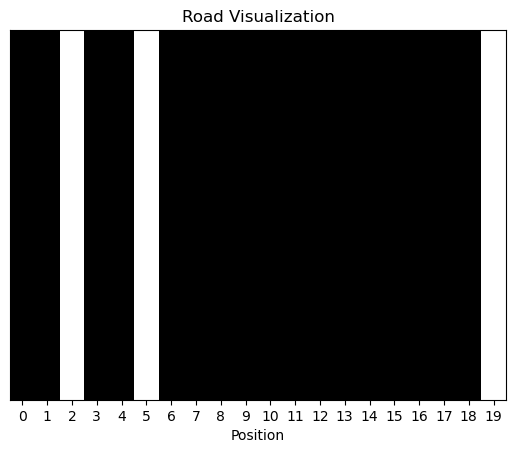


Time step: 26


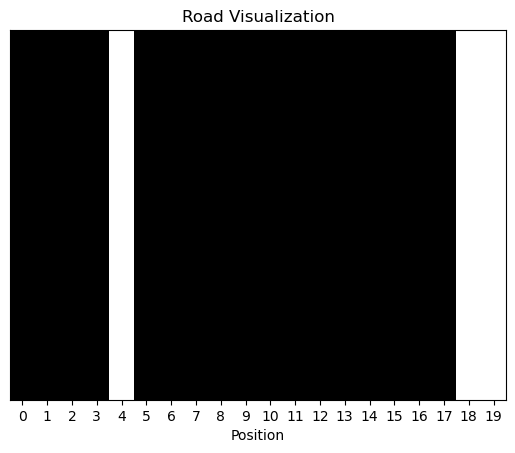


Time step: 27


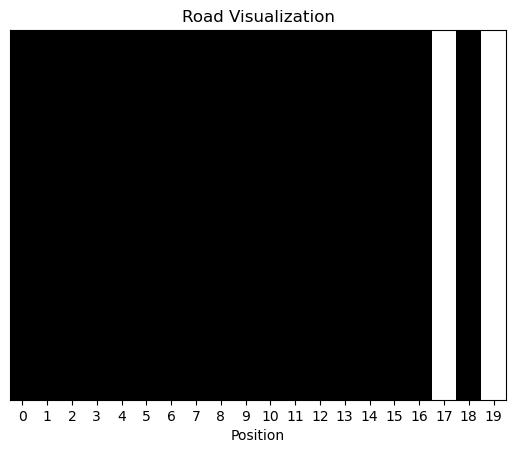


Time step: 28


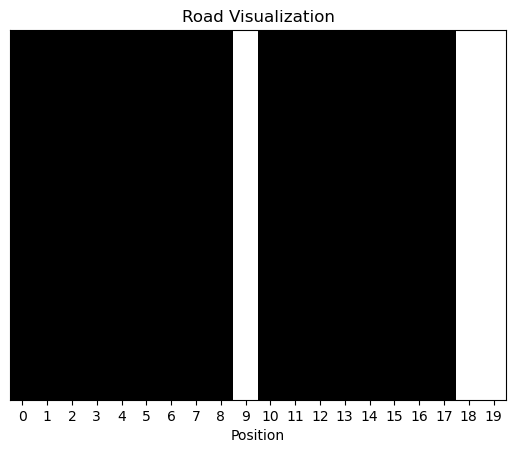


Time step: 29


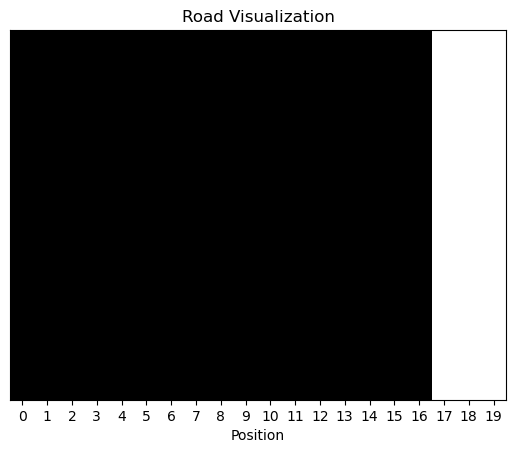


Time step: 30


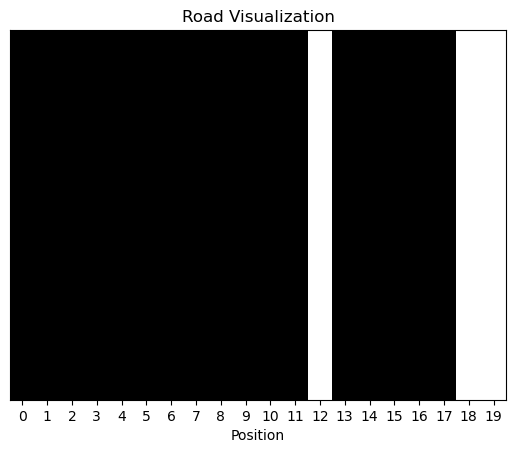

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, max_velocity, randomization, production_prob):
        self.length = length
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.production_prob = production_prob
        self.vehicles = []

    def update(self):
        new_vehicles = []
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            new_position = (vehicle.position + vehicle.velocity) % self.length
            # Check if the vehicle has reached the end of the road
            if new_position != self.length - 1:
                vehicle.position = new_position
                new_vehicles.append(vehicle)
        self.vehicles = new_vehicles

        # Introduce new vehicles at one end based on production probability
        if np.random.rand() < self.production_prob:
            self.vehicles.append(Vehicle(0, self.max_velocity))

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self):
        road_state = np.zeros(self.length)
        for vehicle in self.vehicles:
            road_state[vehicle.position] = 1
        plt.imshow(road_state.reshape(1, -1), cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.xlabel('Position')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 20
max_velocity = 5
randomization = 0.1
production_prob = 1
road = Road(length, max_velocity, randomization, production_prob)

for i in range(30):
    print("Time step:", i+1)
    road.visualize()
    road.update()
    print()


Time step: 1


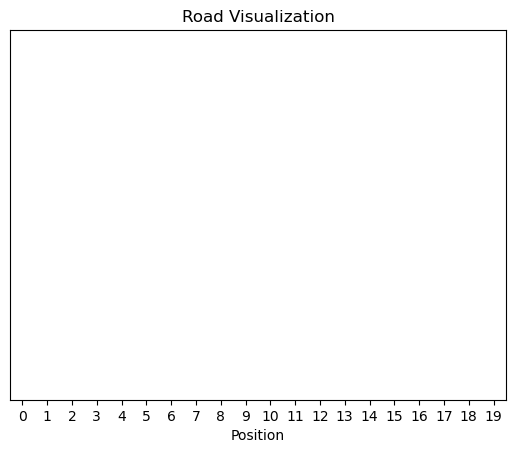


Time step: 2


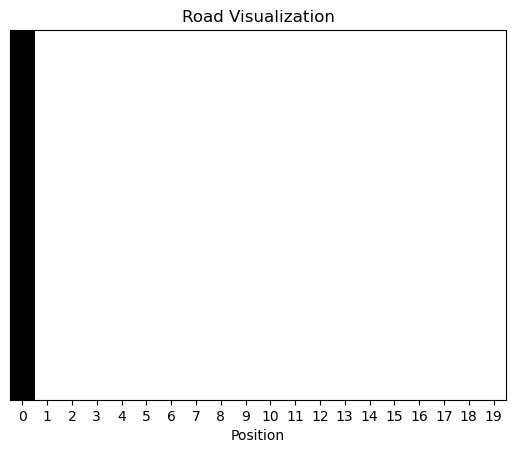


Time step: 3


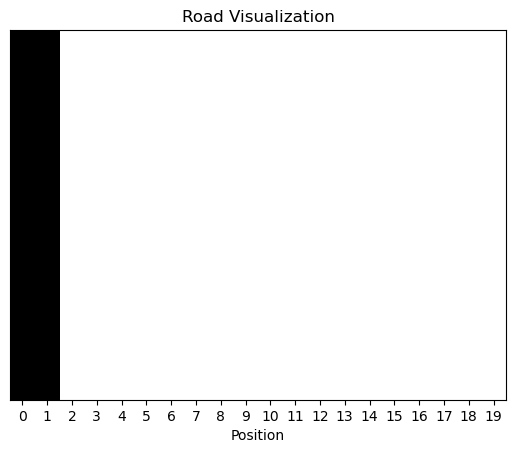


Time step: 4


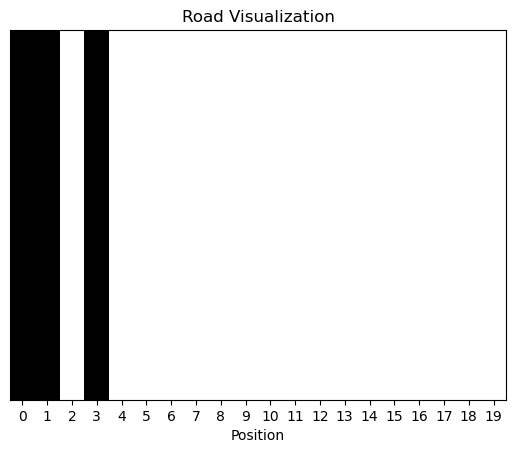


Time step: 5


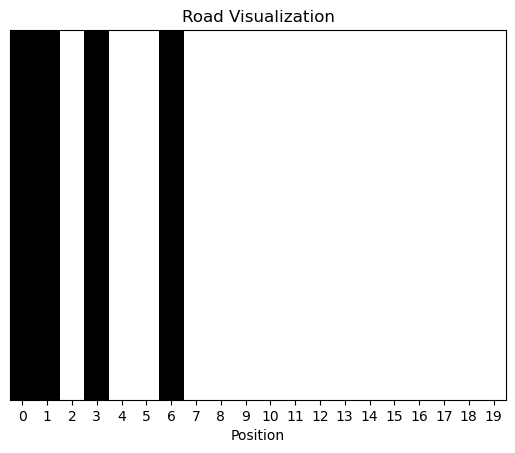


Time step: 6


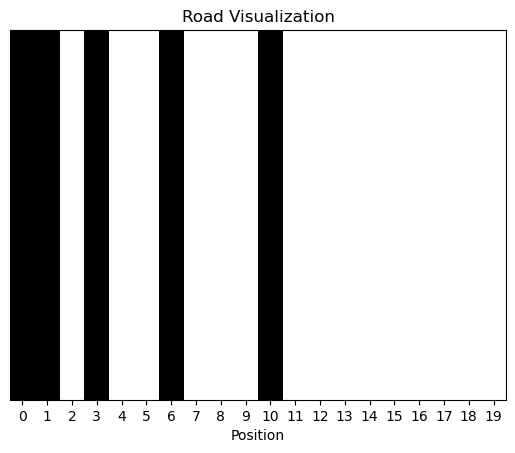


Time step: 7


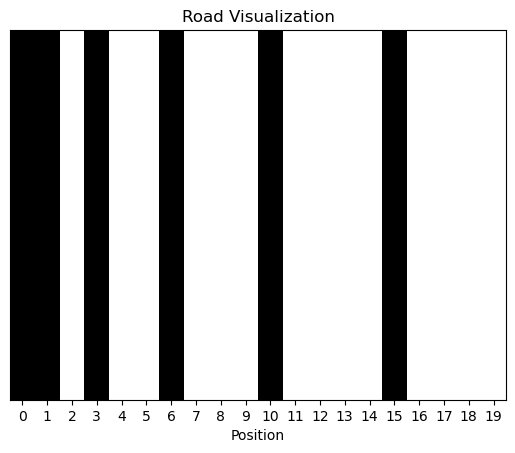


Time step: 8


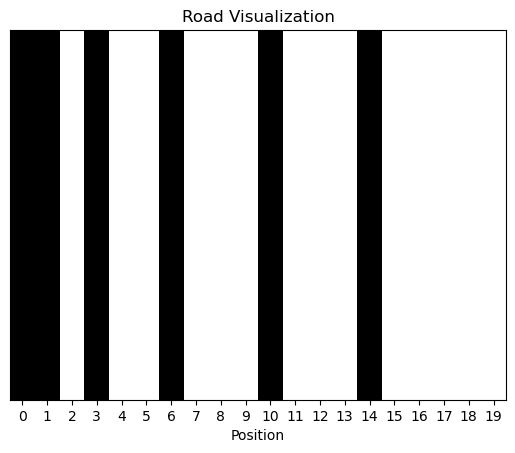


Time step: 9


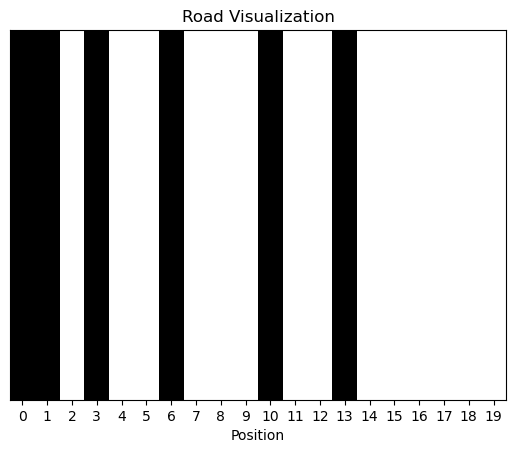


Time step: 10


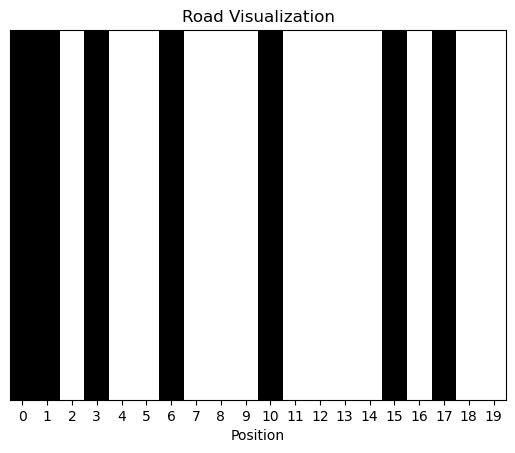


Time step: 11


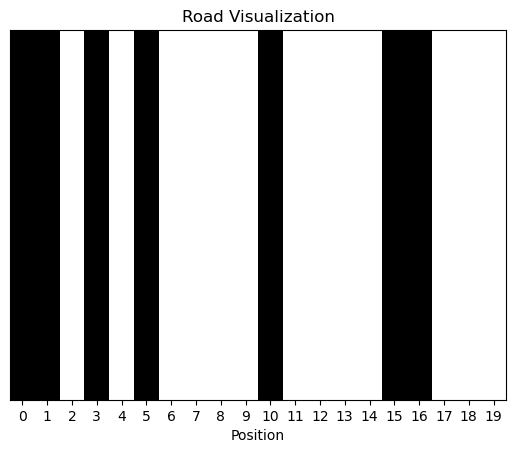


Time step: 12


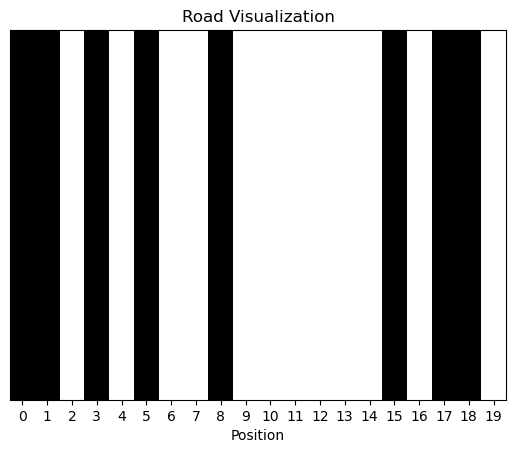


Time step: 13


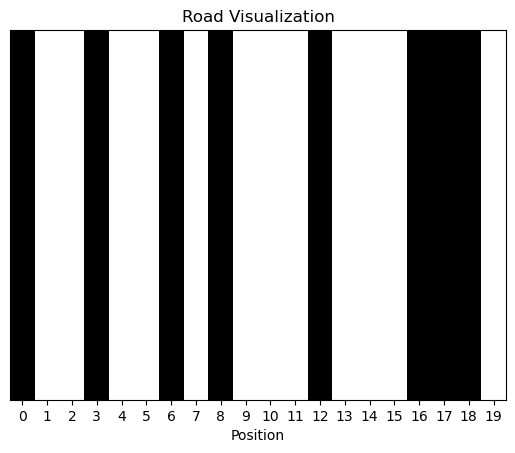


Time step: 14


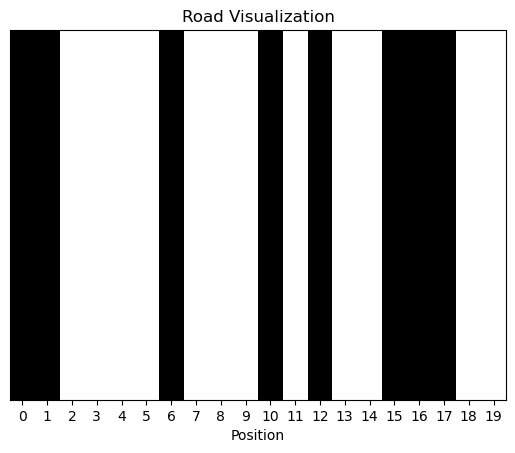


Time step: 15


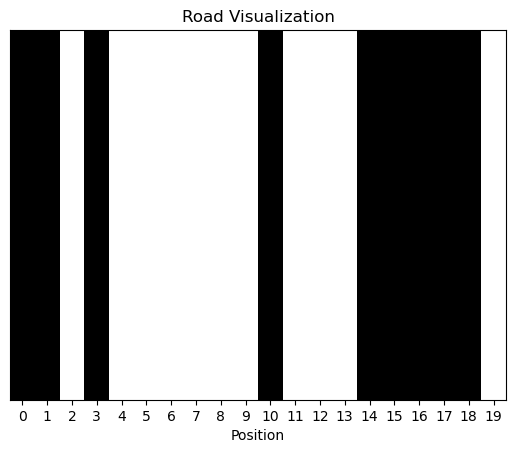


Time step: 16


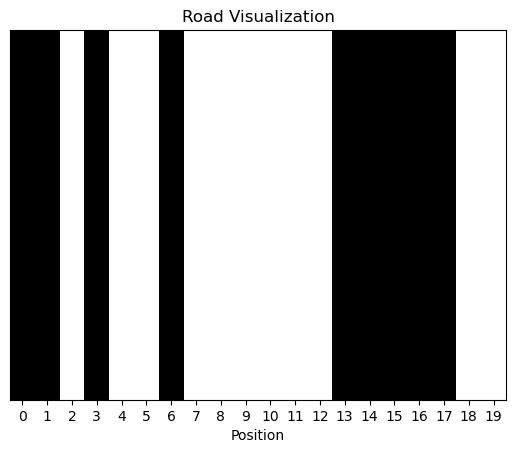


Time step: 17


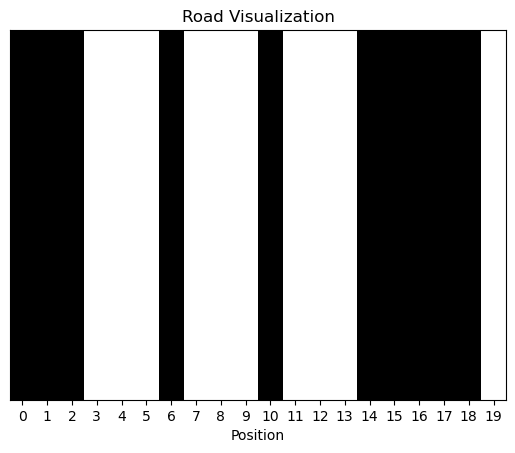


Time step: 18


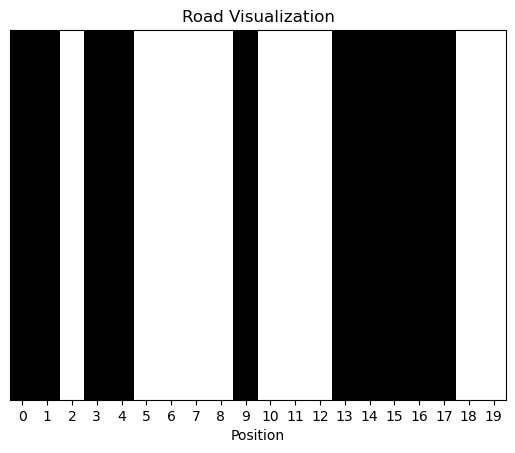


Time step: 19


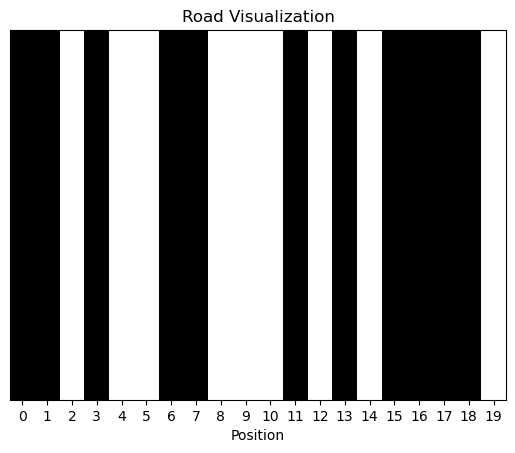


Time step: 20


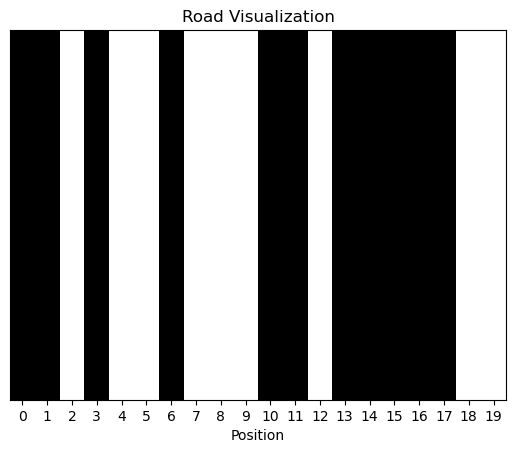

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, max_velocity, randomization, production_prob):
        self.length = length
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.production_prob = production_prob
        self.vehicles = []

    def update(self):
        new_vehicles = []
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            new_position = (vehicle.position + vehicle.velocity) % self.length
            # Check if the vehicle has reached the end of the road
            if new_position != self.length - 1:
                vehicle.position = new_position
                new_vehicles.append(vehicle)
        self.vehicles = new_vehicles

        # Introduce new vehicles at one end based on production probability
        if np.random.rand() < self.production_prob:
            self.vehicles.append(Vehicle(0, self.max_velocity))

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self):
        road_state = np.zeros(self.length)
        for vehicle in self.vehicles:
            road_state[vehicle.position] = 1
        plt.imshow(road_state.reshape(1, -1), cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.xlabel('Position')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 20
max_velocity = 5
randomization = 0.1
production_prob = 1
road = Road(length, max_velocity, randomization, production_prob)

for i in range(20):
    print("Time step:", i+1)
    road.visualize()
    road.update()
    print()
